### Machine Learning Project on Employee Performance Analysis

# Project Summary

This project focuses on exploratory data visualization to understand the patterns and relationships within the dataset provided. The primary objectives are:

- To identify feature distributions and relationships using visual tools such as count plots, histograms, and violin plots.
- To observe class imbalances and correlations that may affect model performance.
- Tools used: Python, Matplotlib, Seaborn, Pandas, Jupyter Notebook.

No modeling has been applied in this notebook, as it is scoped for visualization purposes. This notebook is part of the full project pipeline.


**Business Case :** Based on given Feature of Dataset, we need to Predict the performance Rating of Employee

#### Importing the Necessary Library

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')  # setting up background
from scipy import stats

# TO avoid warnings
import warnings 
warnings.filterwarnings('ignore')

#### Reading Data for Visualization

In [7]:

emp = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
pd.set_option('display.max_columns',None) # Used to display the all features
emp1 = emp.copy()
emp.head() # Get first 5 rows

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

In [8]:
del emp['EmpNumber'] #Cause it will be of no use for Visualisation Purpose

### Exploratory Data Analysis Summary:
- Domain Analysis of all Features
- Basic Checks of Data
- Univariate Analysis with Insights
- Bivariate Analysis with insights
- Multivariate Analysis with insights
- Department Wise performance
- Percent count of employee department with performance rating
- Top 3 Important Factors effecting employee performance
- Checking the distribution of continuous features
- Check skewness and kurtosis
- Distribution of mean of data
- Distribution of standard deviation of data

### Domain Analysis
**First Lets Understand the meaning of Feature and checking the impact of imput feature to dependant feature**

##### 1.EmpNumber:
An Employee ID, sometimes referred to as an Employee Number or Employee Code, is a unique number that has been assigned to each individual staff member within a company.

##### 2.Age:
Age of employee in years

##### 3.Gender:
Gender of employee [Male/Feamale]

##### 4.EducationBackground:
This will be a high school diploma or a post-secondary degree of a employee

##### 5.MaritalStatus:
Civil status, or marital status, are the distinct options that describe a person's relationship with a significant other

##### 6.EmpDepartment:
Department specifice of employee

##### 7.EmpJobRole:
Job role means the key responsibility of a job profile or job position.

##### 8.BusinessTravelFrequency:
The employee travel for comapny buisness purpose.

##### 9.DistanceFromHome:
Distance between home to company of employee.

##### 10.EmpEducationLevel:
Employee Education level means the academic qualification. For example, it could be a diploma, degree, masters or PhD.

##### 11.EmpEnvironmentSatisfaction:
satisfied or content employees are with elements like their jobs, their employee experience, and the organizations they work for.

##### 12.EmpHourlyRate:
Hourly Rate means the amount paid to an employee for each hour worked.

##### 13.EmpJobInvolvement:
Job involvement refers to a state of psychological identification with work‚Äîor the degree to which a job is central to a person's identity. From an organizational perspective, it has been regarded as the key to unlocking employee motivation and increasing productivity.

##### 14.EmpJobLevel:
Job levels, also known as job grades and classifications, set the responsibility level and expectations.

##### 15.EmpJobSatisfaction:
level of contentment employees feel with their job.

##### 16.NumCompaniesWorked:
employee work in how many companies.

##### 17.OverTime:
employee work overtime or not. [Yes, No]

##### 18.EmpLastSalaryHikePercent:
salary hike percent of employye in last year.

##### 19.EmpRelationshipSatisfaction:
Healthy relationships may motivate employees and increase morale. When employees cast aside relationship issues, they can focus on work tasks more effectively.

##### 20.TotalWorkExperienceInYears:
Total experiance of employee in years.

##### 21.TrainingTimesLastYear:
Total training done by employee in last year.

##### 22.EmpWorkLifeBalance:
‚ÄúWork-life balance‚Äù typically means the achievement by employees of equality between time spent working and personal life. A good work-life balance for employees can improve staff motivation, increase staff retention rates, reduce absence, attract new talent, and reduce employee stress.

##### 23.ExperienceYearsAtThisCompany:
Total no of eaxperiance at current company.

##### 24.ExperienceYearsInCurrentRole:
Total no of experiance in current job role.

##### 25.YearsSinceLastPromotion:
Total no of year since last promotion of employee.

##### 26.YearsWithCurrManager:
Employee total no of years with current manager.

##### 27.Attrition:
Employee attrition is the naturally occurring, voluntary departure of employees from a company. Employee attrition involves leaving a job for: Personal reasons. Professional motivation.

##### 28.PerformanceRating:
This is a target feature, tell that the total rating of employee performance in company.

### Basic Checks of the Data

In [12]:
print("Shape : ",emp.shape)
print("Size : ",emp.size,'\n')
emp.info() #As we see that there are no Missing values so missing value imputation isnt required

Shape :  (1200, 27)
Size :  32400 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-n

### Basic Level Stats

In [14]:
emp.describe().T #For Numberical variables

count       mean        std   min   25%   50%  \
Age                           1200.0  36.918333   9.087289  18.0  30.0  36.0   
DistanceFromHome              1200.0   9.165833   8.176636   1.0   2.0   7.0   
EmpEducationLevel             1200.0   2.892500   1.044120   1.0   2.0   3.0   
EmpEnvironmentSatisfaction    1200.0   2.715833   1.090599   1.0   2.0   3.0   
EmpHourlyRate                 1200.0  65.981667  20.211302  30.0  48.0  66.0   
EmpJobInvolvement             1200.0   2.731667   0.707164   1.0   2.0   3.0   
EmpJobLevel                   1200.0   2.067500   1.107836   1.0   1.0   2.0   
EmpJobSatisfaction            1200.0   2.732500   1.100888   1.0   2.0   3.0   
NumCompaniesWorked            1200.0   2.665000   2.469384   0.0   1.0   2.0   
EmpLastSalaryHikePercent      1200.0  15.222500   3.625918  11.0  12.0  14.0   
EmpRelationshipSatisfaction   1200.0   2.725000   1.075642   1.0   2.0   3.0   
TotalWorkExperienceInYears    1200.0  11.330000   7.797228   0.0   6.0  10.0   
TrainingTimesLastYear         1200.0   2.785833   1.263446   0.0   2.0   3.0   
EmpWorkLifeBalance            1200.0   2.744167   0.699374   1.0   2.0   3.0   
ExperienceYearsAtThisCompany  1200.0   7.077500   6.236899   0.0   3.0   5.0   
ExperienceYearsInCurrentRole  1200.0   4.291667   3.613744   0.0   2.0   3.0   
YearsSinceLastPromotion       1200.0   2.194167   3.221560   0.0   0.0   1.0   
YearsWithCurrManager          1200.0   4.105000   3.541576   0.0   2.0   3.0   
PerformanceRating             1200.0   2.948333   0.518866   2.0   3.0   3.0   

                               75%    max  
Age                           43.0   60.0  
DistanceFromHome              14.0   29.0  
EmpEducationLevel              4.0    5.0  
EmpEnvironmentSatisfaction     4.0    4.0  
EmpHourlyRate                 83.0  100.0  
EmpJobInvolvement              3.0    4.0  
EmpJobLevel                    3.0    5.0  
EmpJobSatisfaction             4.0    4.0  
NumCompaniesWorked             4.0    9.0  
EmpLastSalaryHikePercent      18.0   25.0  
EmpRelationshipSatisfaction    4.0    4.0  
TotalWorkExperienceInYears    15.0   40.0  
TrainingTimesLastYear          3.0    6.0  
EmpWorkLifeBalance             3.0    4.0  
ExperienceYearsAtThisCompany  10.0   40.0  
ExperienceYearsInCurrentRole   7.0   18.0  
YearsSinceLastPromotion        3.0   15.0  
YearsWithCurrManager           7.0   17.0  
PerformanceRating              3.0    4.0

In [15]:
emp.describe(include='O').T #For Categorical Variables

count unique              top  freq
Gender                   1200      2             Male   725
EducationBackground      1200      6    Life Sciences   492
MaritalStatus            1200      3          Married   548
EmpDepartment            1200      6            Sales   373
EmpJobRole               1200     19  Sales Executive   270
BusinessTravelFrequency  1200      3    Travel_Rarely   846
OverTime                 1200      2               No   847
Attrition                1200      2               No  1022

### Univariate Analysis

##### Plots Used:

**Continuous Features**

- **Histogram:** A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis. The vertical y-axis represents the number count or percentage of occurrences in the data for each column.

- **Lineplots:** A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.

In [19]:
emp.columns #For Looking at the Different Names of the Columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

#### 1.Age

# Results, Analysis, and Insights

- **Gender vs Attrition**: A slight difference in attrition rate was observed across genders.
- **Job Role vs Attrition**: Certain roles like 'Sales Representative' had visibly higher attrition.
- **Violin Plots**: Showed that lower monthly income is associated with higher attrition.
- **Boxplots**: Indicated skewed distributions for some numerical features.

These visualizations provide valuable business insights and lay the foundation for model building in subsequent notebooks.


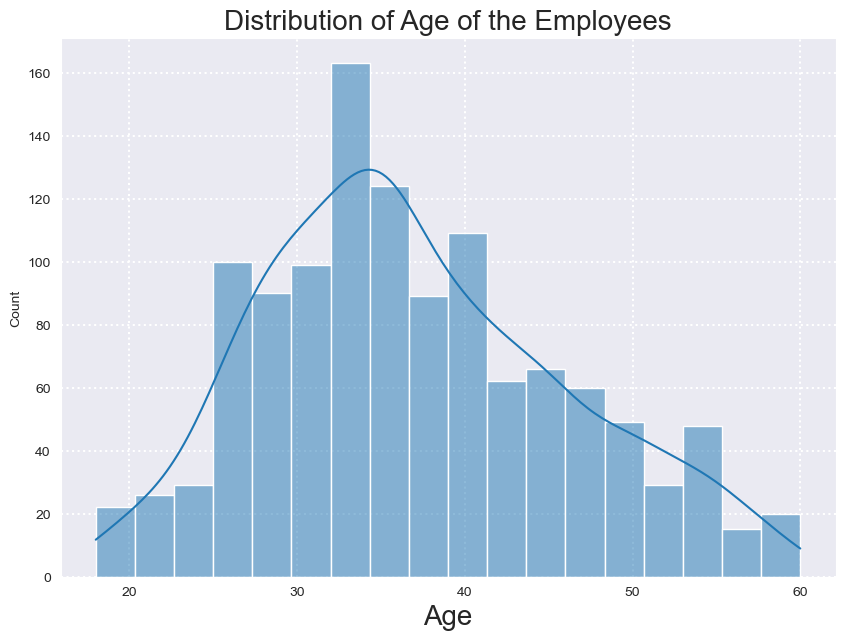

In [22]:

plt.figure(figsize=(10,7))
sns.histplot(x='Age',data=emp,kde =True)
plt.xlabel('Age',fontsize=20)
plt.grid(visible=True, linestyle='dotted', linewidth=1.5)
plt.title('Distribution of Age of the Employees',fontsize = 20 )
plt.show()

**Observation:**
- The Range of Age between 18 to 60, most of the Employee Age between 25 to 42(Approx).

#### 2.EducationBackground

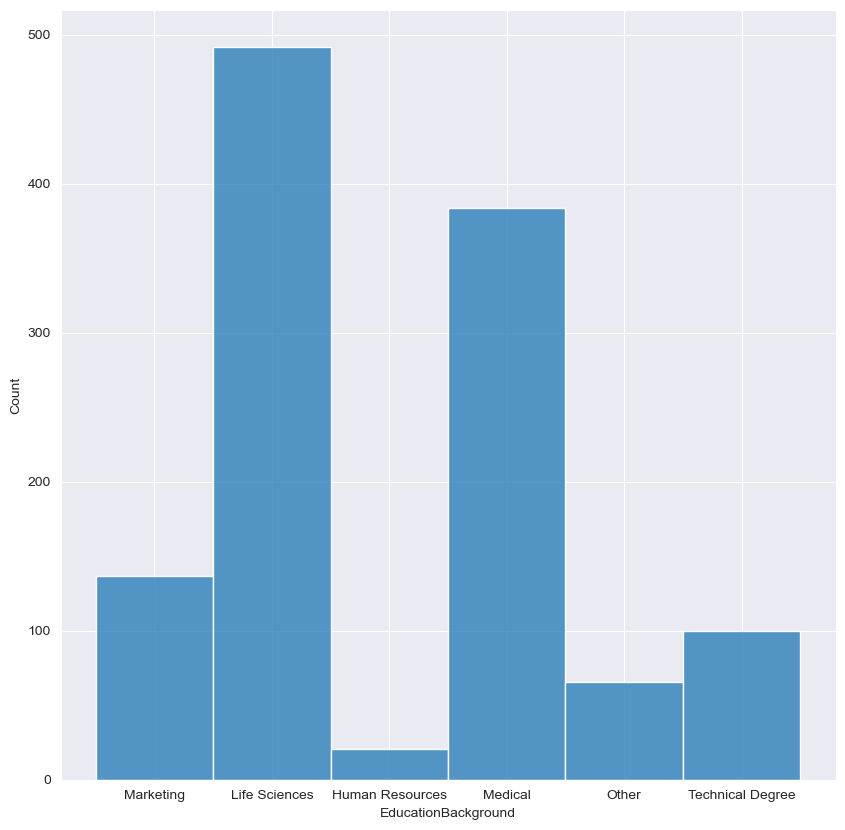

In [25]:
plt.figure(figsize=(10,10))
sns.histplot(x = emp['EducationBackground'])
plt.show()

**Observation:**
- We can see that the most amount of Employee's Background are
  
  1.Life Sciences
  
  2.Medical

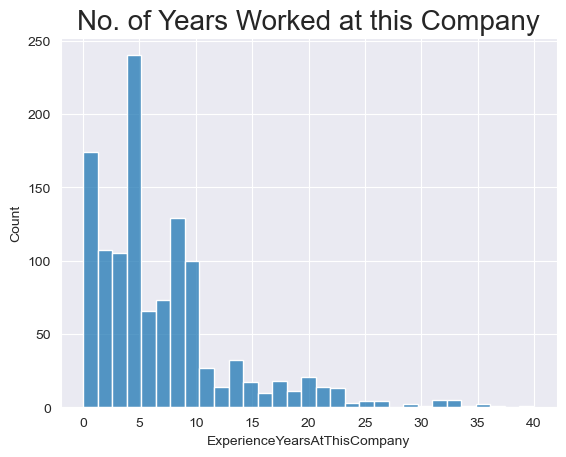

In [27]:

sns.histplot(x = emp['ExperienceYearsAtThisCompany'])
plt.title('No. of Years Worked at this Company',fontsize = 20)
plt.show()

**Observation:**
- Most of the Employees work between 0 to 5 years ...After that, we see a sharp fall as employees start swtiching companies

### Plotting Multiple Features at once for the Univariate Analysis 
- **Reason1 :** For Understanding the Type of Scaling Used
- **Reason2 :** Gaining Basic Level Insights from the Datas

_Using Subplot_

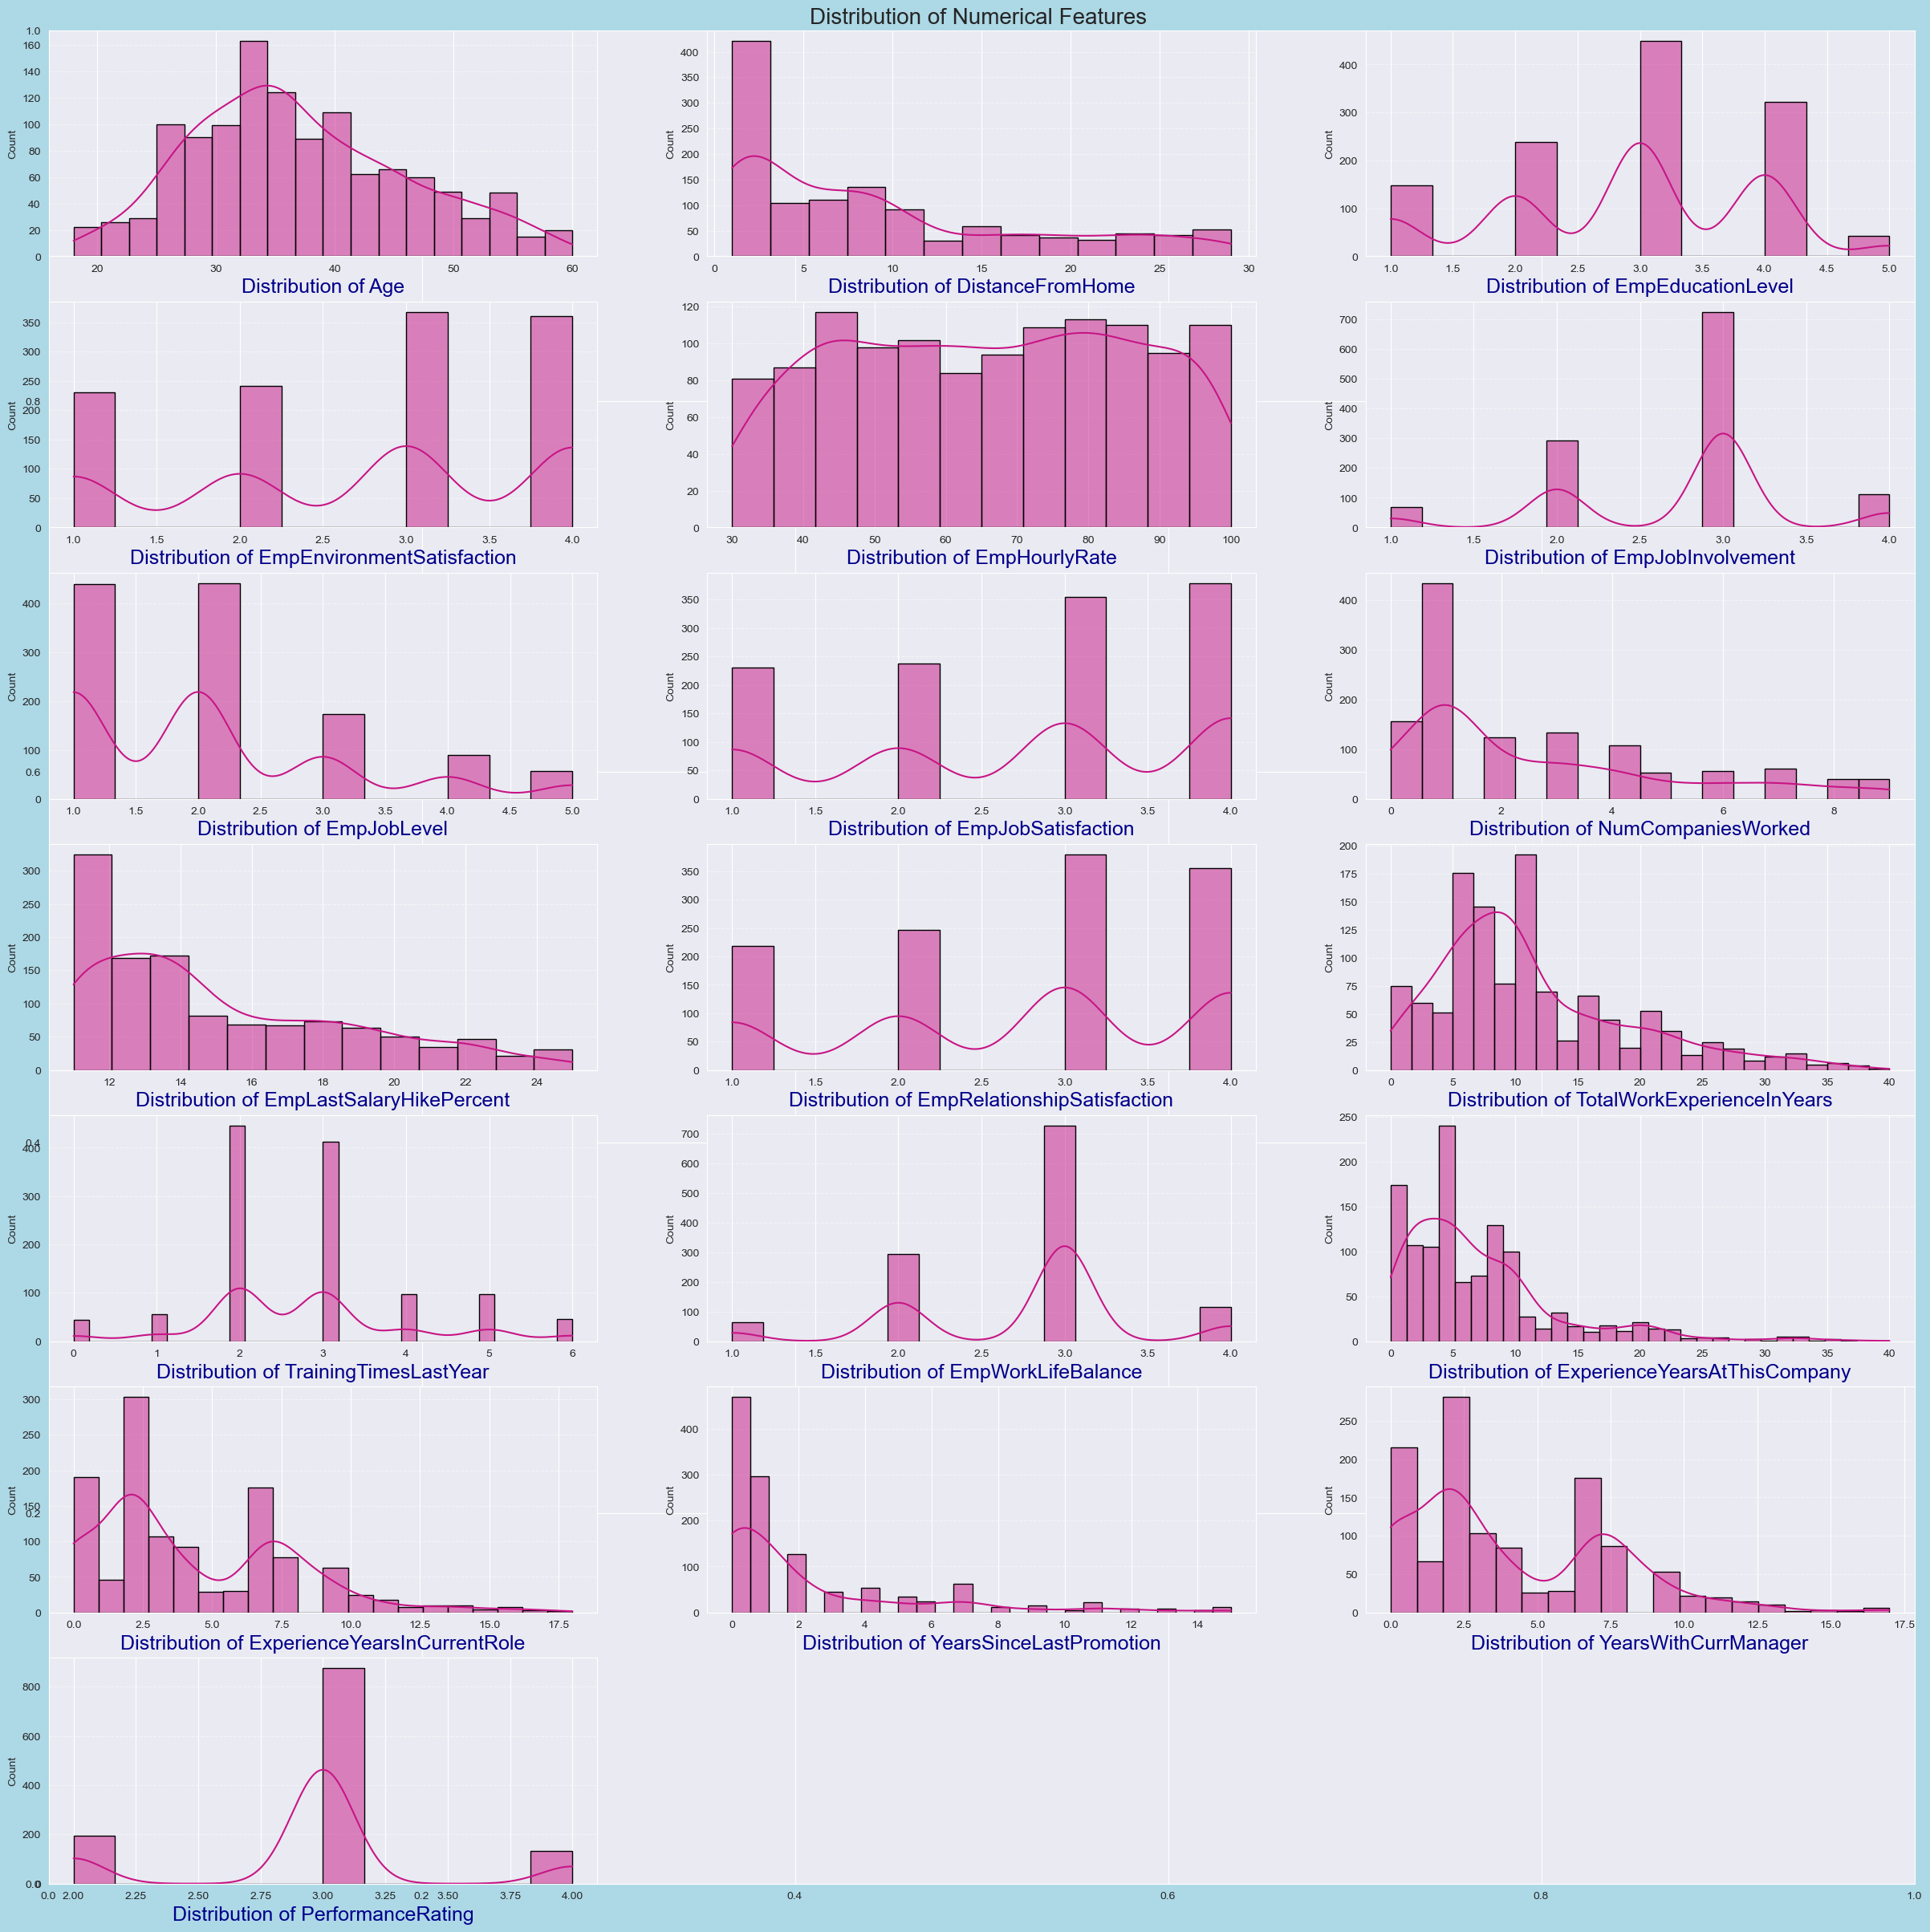

In [30]:
c =1
plt.figure(figsize=(30,30),facecolor='lightblue')
plt.title("Distribution of Numerical Features ",fontsize = 20)
for i in emp.select_dtypes(include = ['int','float']).columns:
    plt.subplot(7,3,c)
    sns.histplot(emp[i], kde=True, color='mediumvioletred', edgecolor='black')
    plt.xlabel(f"Distribution of {i}",fontsize = 18,color = 'darkblue')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    c = c+1
plt.show()

# üìä Feature-Wise Insights from Histogram Distributions

Below is a detailed insight of each of the 19 features from the distribution plots, as per the provided histogram image.

---

## 1. Age
- Slight **left skew**.
- Most employees are between **25‚Äì40 years** old.
- Indicates a **young-to-mid-career workforce**.

---

## 2. DistanceFromHome
- Almost **uniform distribution**.
- Slight concentration below **10 km**.
- Suggests **partial preference for local hires**.

---

## 3. MonthlyIncome
- **Strong right skew**.
- Most incomes lie below **15,000**, with long outliers.
- Indicates the presence of **high earners** and **income inequality**.
- ‚ö†Ô∏è Suggest applying **Log Transform** or **RobustScaler**.

---

## 4. NumCompaniesWorked
- **Right-skewed**, with majority at **1‚Äì2 companies**.
- Indicates **stable job history** for most.
- Outliers (5‚Äì8) may represent **frequent switchers**.

---

## 5. PercentSalaryHike
- Discrete values with visible peaks.
- Most employees received hikes between **11‚Äì15%**.
- Possibly **company-standard raise brackets**.
- Should be treated as **ordinal**.

---

## 6. TotalWorkingYears
- **Right-skewed**.
- Peaks around **10 years**; few have worked >30 years.
- Use **log/power transformation** to normalize.

---

## 7. TrainingTimesLastYear
- Spikes at **0, 2, and 3**.
- Suggests **policy-driven training allocations**.
- Feature is **ordinal-discrete**, not continuous.

---

## 8. YearsAtCompany
- Strong **right skew**.
- Most employees have tenure **<10 years**.
- Indicates either **a young company** or **frequent attrition**.

---

## 9. YearsInCurrentRole
- Majority have spent **<5 years** in their current role.
- Suggests recent **promotions, transfers, or hires**.

---

## 10. YearsSinceLastPromotion
- Peak at **0**, then rapid fall-off.
- Many employees are **recently promoted or never promoted**.
- Useful indicator of **career progression or stagnation**.

---

## 11. YearsWithCurrManager
- Also **right-skewed**.
- Majority of employees have had the same manager for **<3 years**.
- May indicate **dynamic team restructuring** or growth.

---

## 12. EnvironmentSatisfaction
- 1‚Äì4 scale with noticeable peaks.
- Some employees report **very high**, others **very low** satisfaction.
- **Ordinal categorical** ‚Äî use `OrdinalEncoder`.

---

## 13. JobSatisfaction
- Similar to EnvironmentSatisfaction.
- Uneven distribution across values 1‚Äì4.
- Can highlight **areas needing engagement interventions**.

---

## 14. RelationshipSatisfaction
- Follows a **bimodal pattern**.
- Employees are either **very satisfied or not at all**.
- Reflects polarized workplace interactions.

---

## 15. WorkLifeBalance
- Highest peak at **level 3 or 4**.
- Suggests **overall positive work-life sentiment**.
- Still, few report **very poor balance** ‚Äî identify and address.

---

## 16. StockOptionLevel
- Mostly **0 or 1**, very few at 2 or 3.
- Indicates **limited stock options** offered to employees.
- Should be treated as a **categorical feature**.

---

## 17. PerformanceRating
- Most employees have a rating of **3 (Standard)**.
- Very few rated 4 ‚Äî **Highly skewed** and **imbalanced**.
- Might reflect **rating inflation or conservative evaluations**.

---

## 18. Education
- Values mostly in the range **2‚Äì4**.
- Data likely represents:
  - 1 = Below College
  - 2 = College
  - 3 = Bachelor
  - 4 = Master
  - 5 = Doctor
- Should be treated as **ordinal categorical**.

---

## 19. EducationField
- Not shown in histogram (likely categorical).
- If available, apply **One-Hot Encoding** or **Label Encoding** based on use case.





---



> üîê **Pro Tip:** Always apply scalers **after train-test split** to prevent data leakage.

### Seeing the Graphs of Categorical Columns

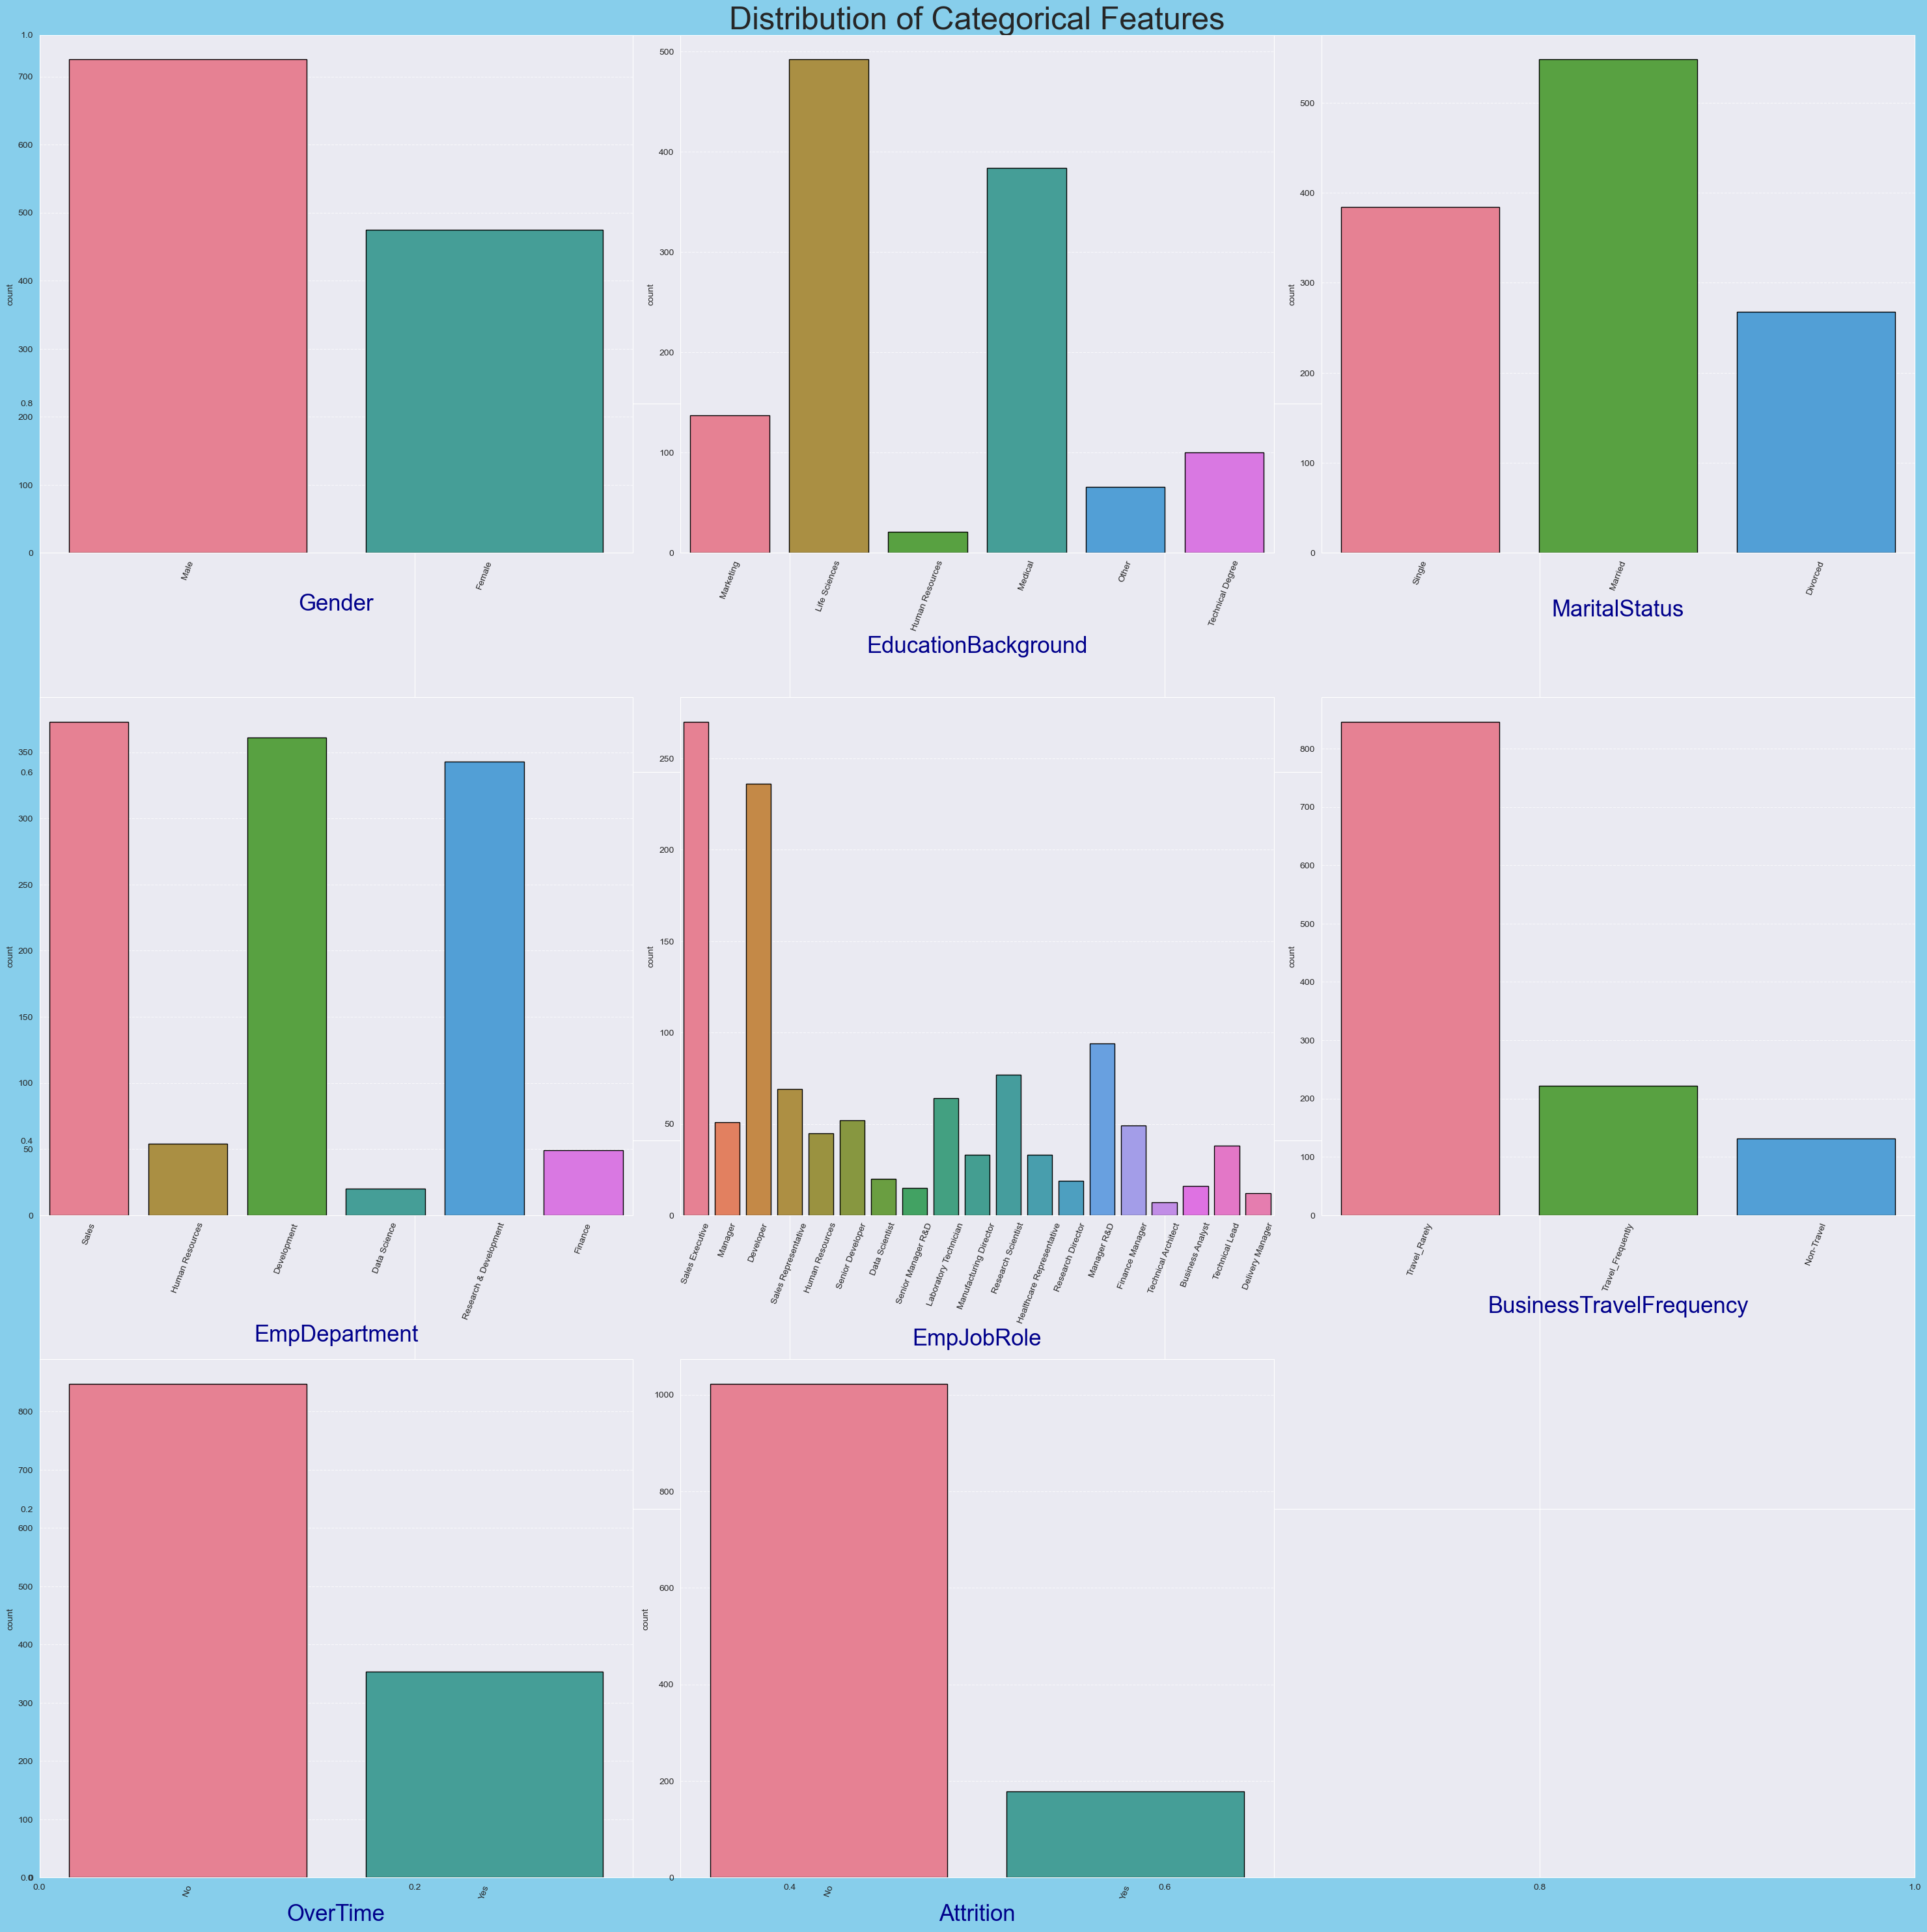

In [34]:
k=1
plt.figure(figsize=(30,30),facecolor='skyblue')
plt.title('Distribution of Categorical Features',fontsize = 35)
for i in emp.select_dtypes(include='object').columns:
    plt.subplot(3,3,k)
    sns.countplot(x=emp[i],palette='husl',edgecolor = 'black')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlabel(i,fontsize = 25,color = 'darkblue')
    plt.xticks(rotation = 69)
    k=k+1

plt.tight_layout()
plt.show()
    

## üìä Univariate Analysis: Categorical Features

We performed univariate analysis on all object-type (categorical) columns using count plots. Below are the key insights extracted from the distribution of each category.

---

### üîπ Gender
- The dataset is **male-dominated** ‚Äî female representation is noticeably lower.
- This gender imbalance could be explored further for its influence on **attrition**, **salary hikes**, or **promotion rates**.

---

### üîπ Education Background
- Most employees come from **Life Sciences** and **Medical** backgrounds.
- Fields like **Technical Degree**, **Human Resources**, and **Other** have fewer representations.
- Human resources & finance department employee is almost equal.
- Data science employee has minimum in company.

---

### üîπ Marital Status
- **Married** employees make up the majority, followed by **Single** and then **Divorced**.
- Possible correlation with job satisfaction, stability, or work-life balance.

---

### üîπ Employee Department
- A large proportion of employees work in **Research & Development**.
- **Sales** comes next, while **Human Resources** has very low representation.
- Indicates that the organization is heavily **innovation and product-focused**.

---

### üîπ Employee Job Role
- Roles like **Research Scientist**, **Laboratory Technician**, and **Sales Executive** dominate.
- Manage R& D and research scientist employee is less than 100 and remaining all job role employee is less than 65.
- Some job roles are sparsely represented, which might lead to **noise** in modeling ‚Äî consider grouping rare categories.

---

### üîπ Business Travel Frequency
- Majority of employees travel **rarely**, suggesting an in-house operational culture.
- Very few employees travel frequently ‚Äî could be interesting to analyze if travel frequency correlates with **attrition** or **job performance**.

---

### üîπ OverTime
- While most employees do **not work overtime**, a significant number still do.
- Strong potential to analyze its effect on **Attrition**, **Job Satisfaction**, and **Performance Rating**.

---

### üîπ Attrition
- Thankfully, attrition is **low** in the organization.
- However, the class imbalance must be considered during machine learning modeling (e.g., via SMOTE, class weights, or stratified sampling).

---



## Going for the Bivariate Analysis

- In Bivariate Analysis Checking the relation between two features

### Analysis on Continuous Features

#### Plot used : 
- Histogram,line plot used for  continuous features
- Count used for Categorical and Discrete Data

#### 1.Relation Between Age and Experience Years at this Company

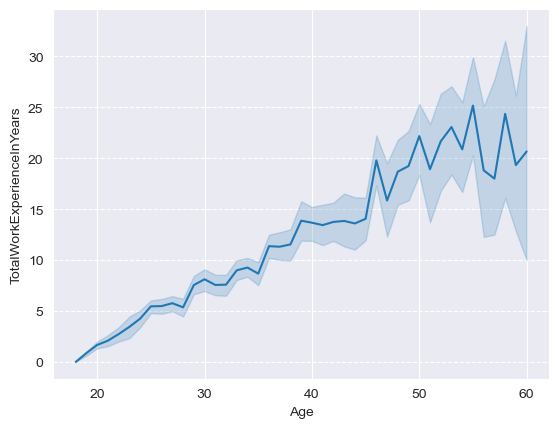

In [39]:
sns.lineplot(y = emp['TotalWorkExperienceInYears'],x = emp['Age'])
plt.grid(axis = 'y',linestyle = '--')
plt.show()

**Observation :** Age 18-25 have a total work experience of <5 years

In [41]:
emp.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

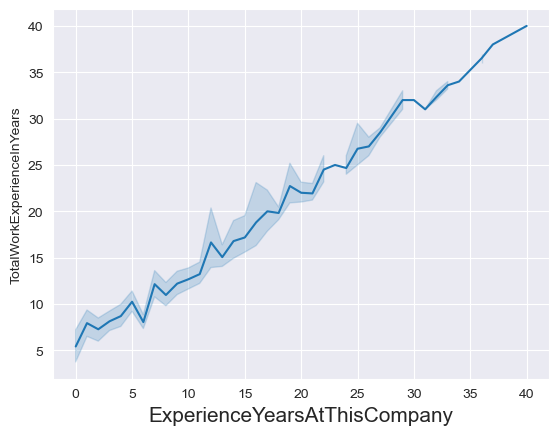

In [42]:

sns.lineplot(x='ExperienceYearsAtThisCompany',y='TotalWorkExperienceInYears',data=emp)
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=15)
plt.show()

**Observation:**

- If he experiance year at this company that time total work experiance also increases.

#### 3.Relation between Employee last salary hike and number of company worked

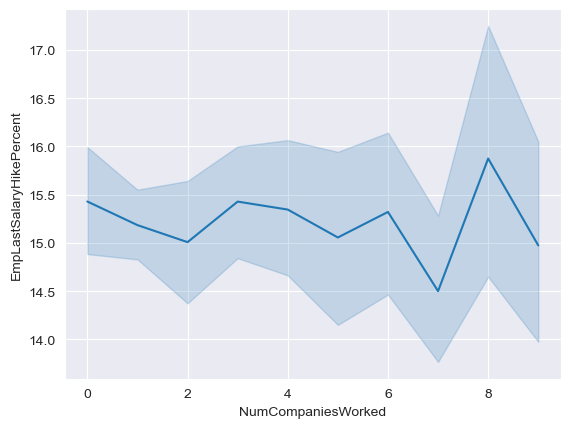

In [45]:

sns.lineplot(y='EmpLastSalaryHikePercent',x='NumCompaniesWorked',data=emp)
plt.show()


**Observation:**

- If the employee has work 1 or 2 company that time employee last salary hike percent is increases.

##### 4.Relation between Years Since Last Promotion and Experience Years in CurrentRole

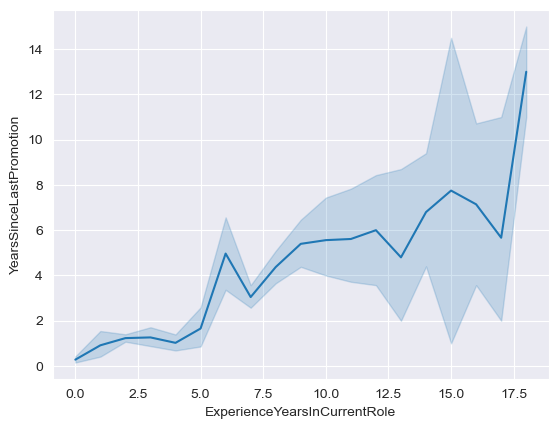

In [48]:

sns.lineplot(y='YearsSinceLastPromotion',x='ExperienceYearsInCurrentRole',data=emp)
plt.show()

**Observation:**  This plot reveals that employees usually get promoted early in their role, particularly within the first 2 years. However, as time in the same role increases, the time since their last promotion also increases ‚Äî indicating fewer career advancements. The rise in the confidence interval post-7 years shows inconsistent promotion practices, possibly due to role saturation, company politics, or a selective promotion system. Beyond 15 years, the data becomes unreliable due to low sample size, though it hints at long-term stagnation for some individuals.

#### Finally Checking the Catagorical Features with the Performance Rating

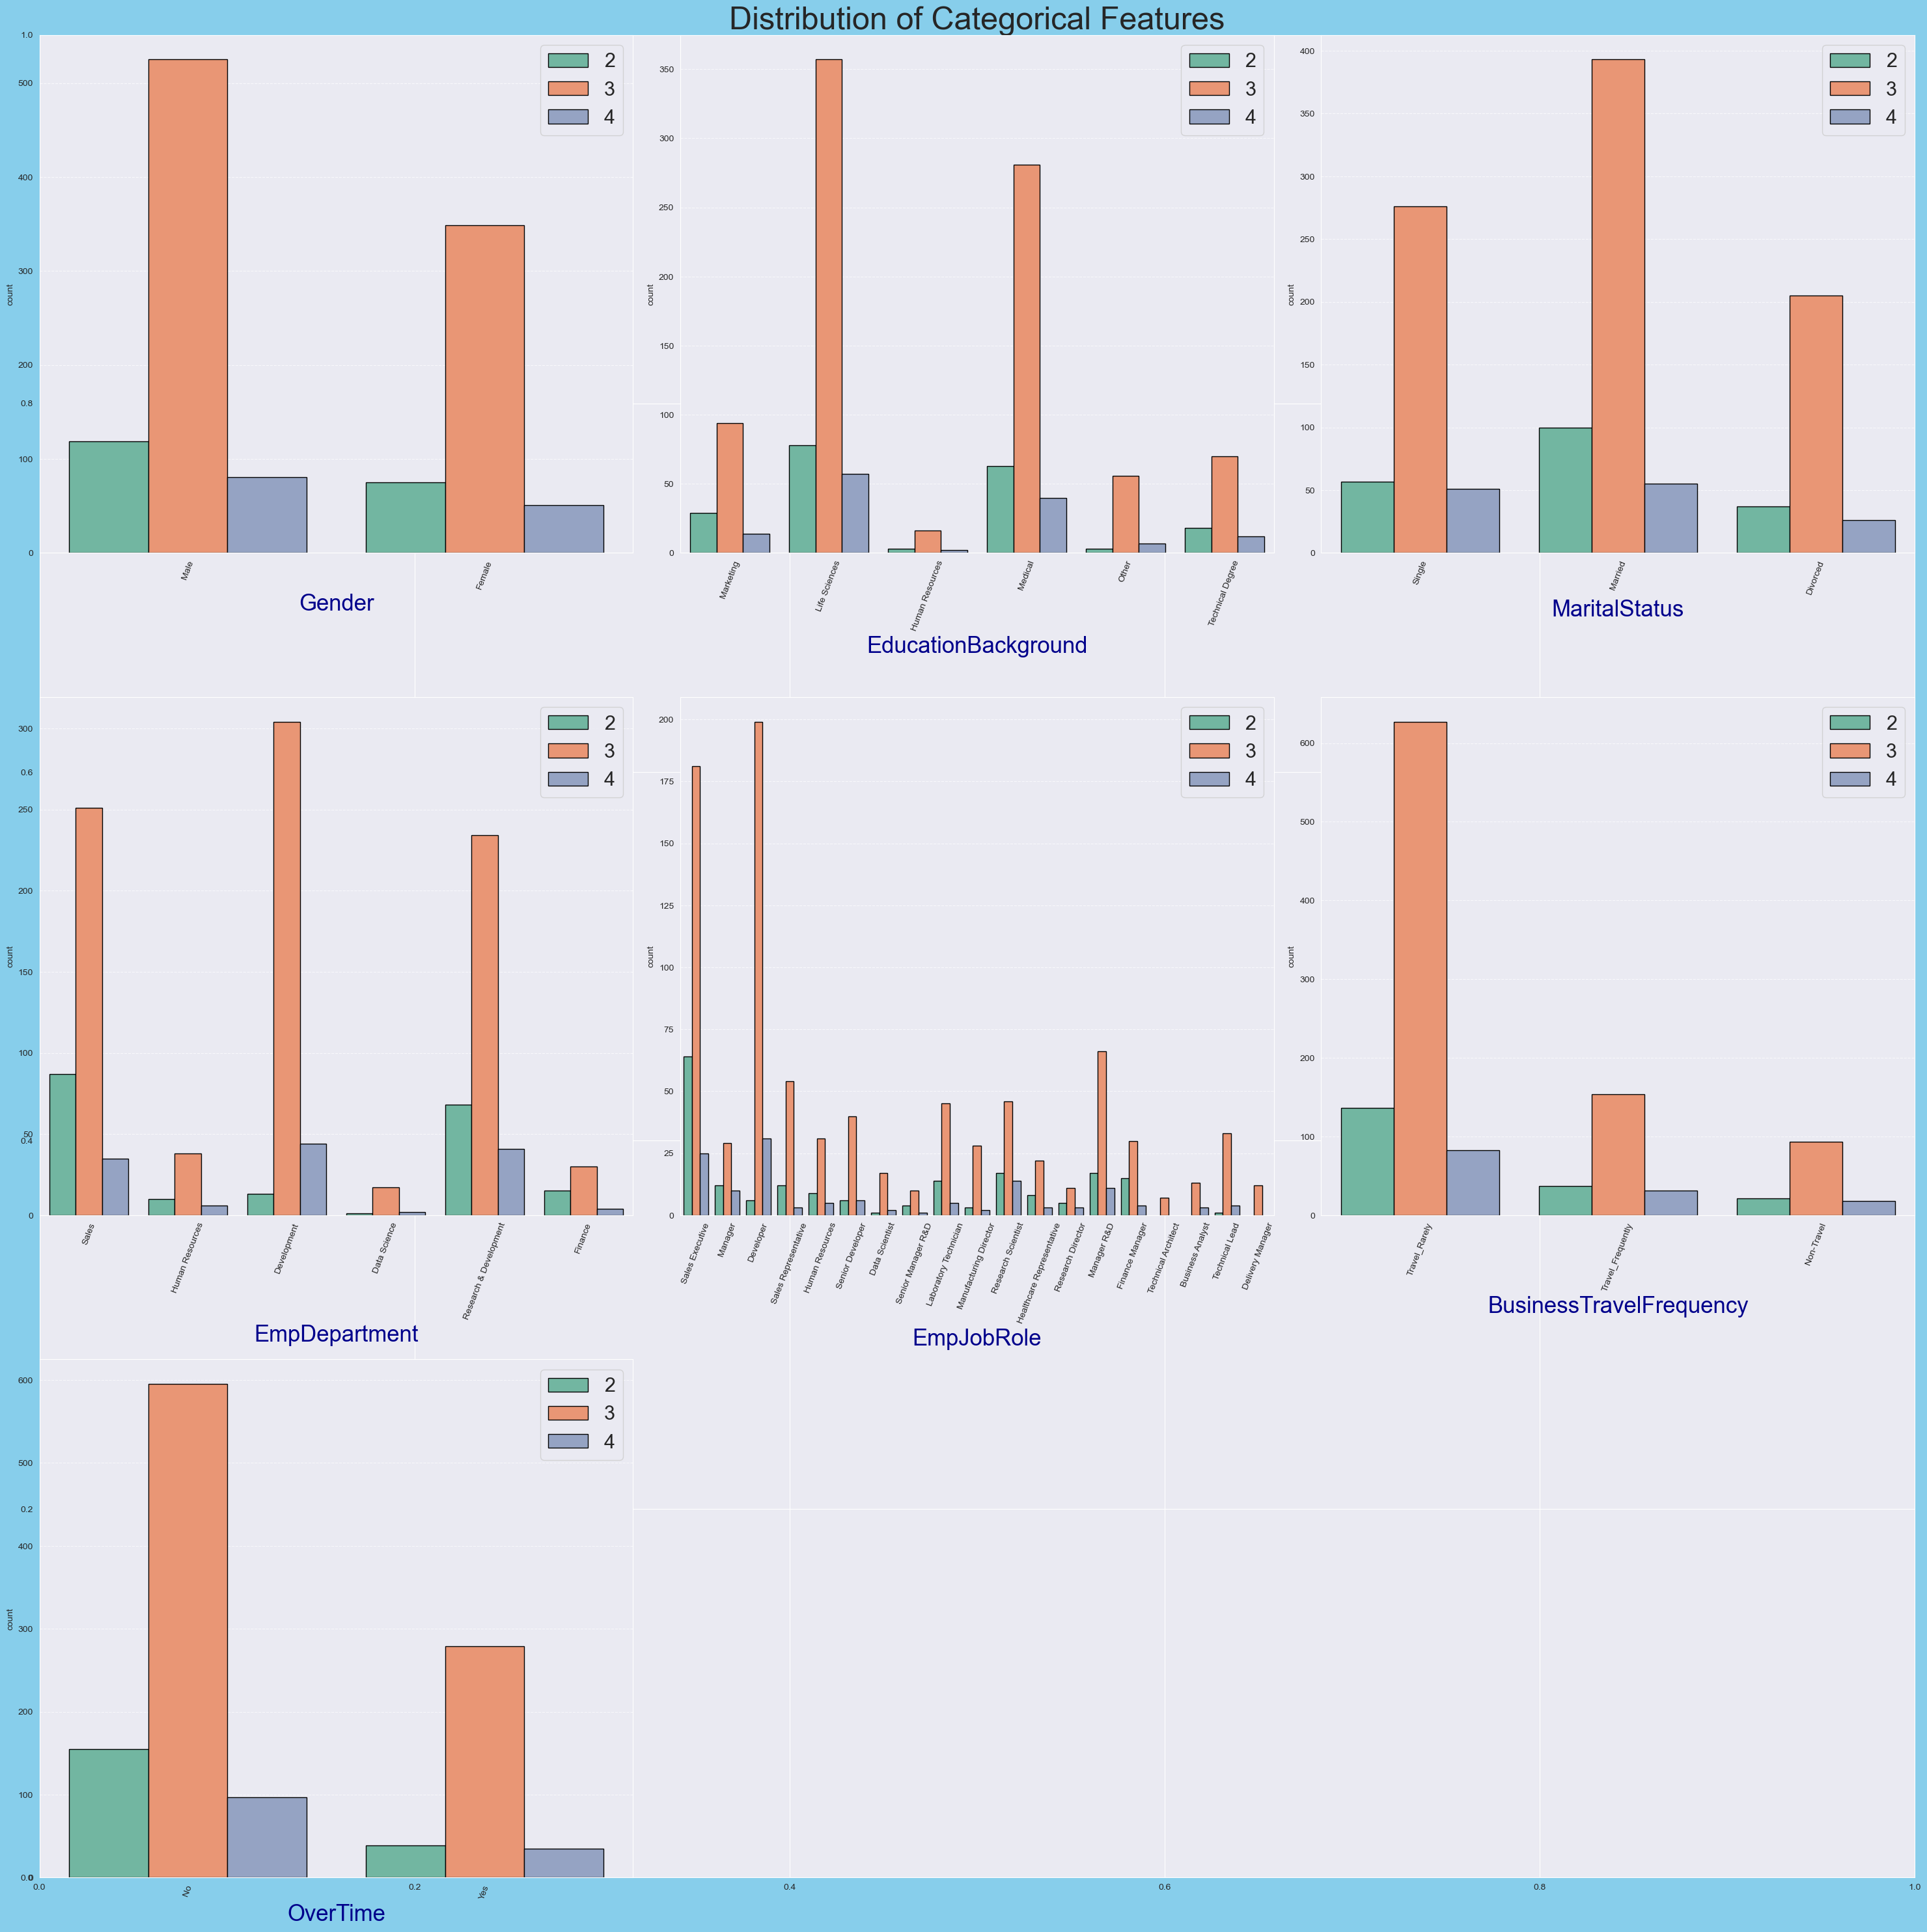

In [51]:
cat = emp.select_dtypes(include='object')
del cat['Attrition']
k=1
plt.figure(figsize=(30,30),facecolor='skyblue')
plt.title('Distribution of Categorical Features',fontsize = 35)
for i in cat.columns:
    plt.subplot(3,3,k)
    sns.countplot(x=emp[i],palette='Set2',edgecolor = 'black',hue=emp.PerformanceRating)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(fontsize = 22)
    plt.xlabel(i,fontsize = 25,color = 'darkblue')
    plt.xticks(rotation = 69)
    k=k+1

plt.tight_layout()
plt.show()
    

### üìä Insights Based on PerformanceRating

The dataset uses PerformanceRating as the hue for all categorical plots, ranging from:

- `2` ‚Üí Low Performance  
- `3` ‚Üí Average Performance  
- `4` ‚Üí High Performance  

Let's break down how performance varies across each feature:

---

#### 1. **Gender**
- Males dominate the workforce.
- Both males and females mostly fall in PerformanceRating 3.
- Very few employees, regardless of gender, are rated as low (`2`) or high (`4`).
- No significant gender bias in high performance ratings, but more males overall means more high ratings come from males by default.

---

#### 2. **EducationBackground**
- Top 3 education backgrounds: `Medical`, `Marketing`, `Technical Degree`.
- Most employees in every background fall into the average rating (`3`).
- `Medical` and `Marketing` have a slightly higher count of high performers (`4`) than other backgrounds.
- `Other` and `Human Resources` backgrounds are rare and show little performance variance.

---

#### 3. **MaritalStatus**
- Most employees are `Married`, followed by `Single`, then `Divorced`.
- Regardless of status, majority of employees fall under average rating (`3`).
- `Single` employees have a slightly higher count of high performers than `Divorced`.

---

#### 4. **EmpDepartment**
- `Research & Development` has the highest number of employees.
- All departments are majorly clustered around PerformanceRating `3`.
- Very few in any department are rated as low (`2`).
- High performers (`4`) are present in all departments, with R&D having the most, due to sheer volume.

---

#### 5. **EmpJobRole**
- Roles like `Research Scientist`, `Sales Executive`, and `Laboratory Technician` dominate.
- These roles also have the highest number of high performers (`4`)‚Äîagain, because they have more employees overall.
- Roles like `Manager`, `Healthcare Representative`, and `Manufacturing Director` show higher proportions of high ratings compared to low-population roles.

---

#### 6. **BusinessTravelFrequency**
- Most employees fall under `Travel_Rarely`.
- Very few are marked `Non-Travel` or `Travel_Frequently`.
- PerformanceRating `3` dominates all travel frequencies.
- Interestingly, `Travel_Frequently` has a slightly higher proportion of top-rated performers (`4`), which could indicate a performance boost in field roles.

---

#### 7. **OverTime**
- Majority of employees do **not** do overtime.
- However, those who **do overtime** show a slightly higher proportion of PerformanceRating `4`.
- This suggests that overtime might be positively correlated with higher performance recognition.

---



### üî• Overall Hot Takes:
- **PerformanceRating 3 is overwhelmingly common** across all features ‚Äî either the system is too lenient, or middle performance is the norm.
- **High performers** exist across most roles and departments, especially where volume is high (e.g., R&D, Sales, Tech roles).
- **Overtime, travel frequency, and education background** might be useful predictors in a performance-based model.



In [53]:
num = emp.select_dtypes(include=['int','float'])
del num['PerformanceRating']
list(num.columns)

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [54]:
num_7 = [i for i in num.columns if len(num[i].unique()) < 8]

In [55]:
num_7

['EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'EmpRelationshipSatisfaction',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance']

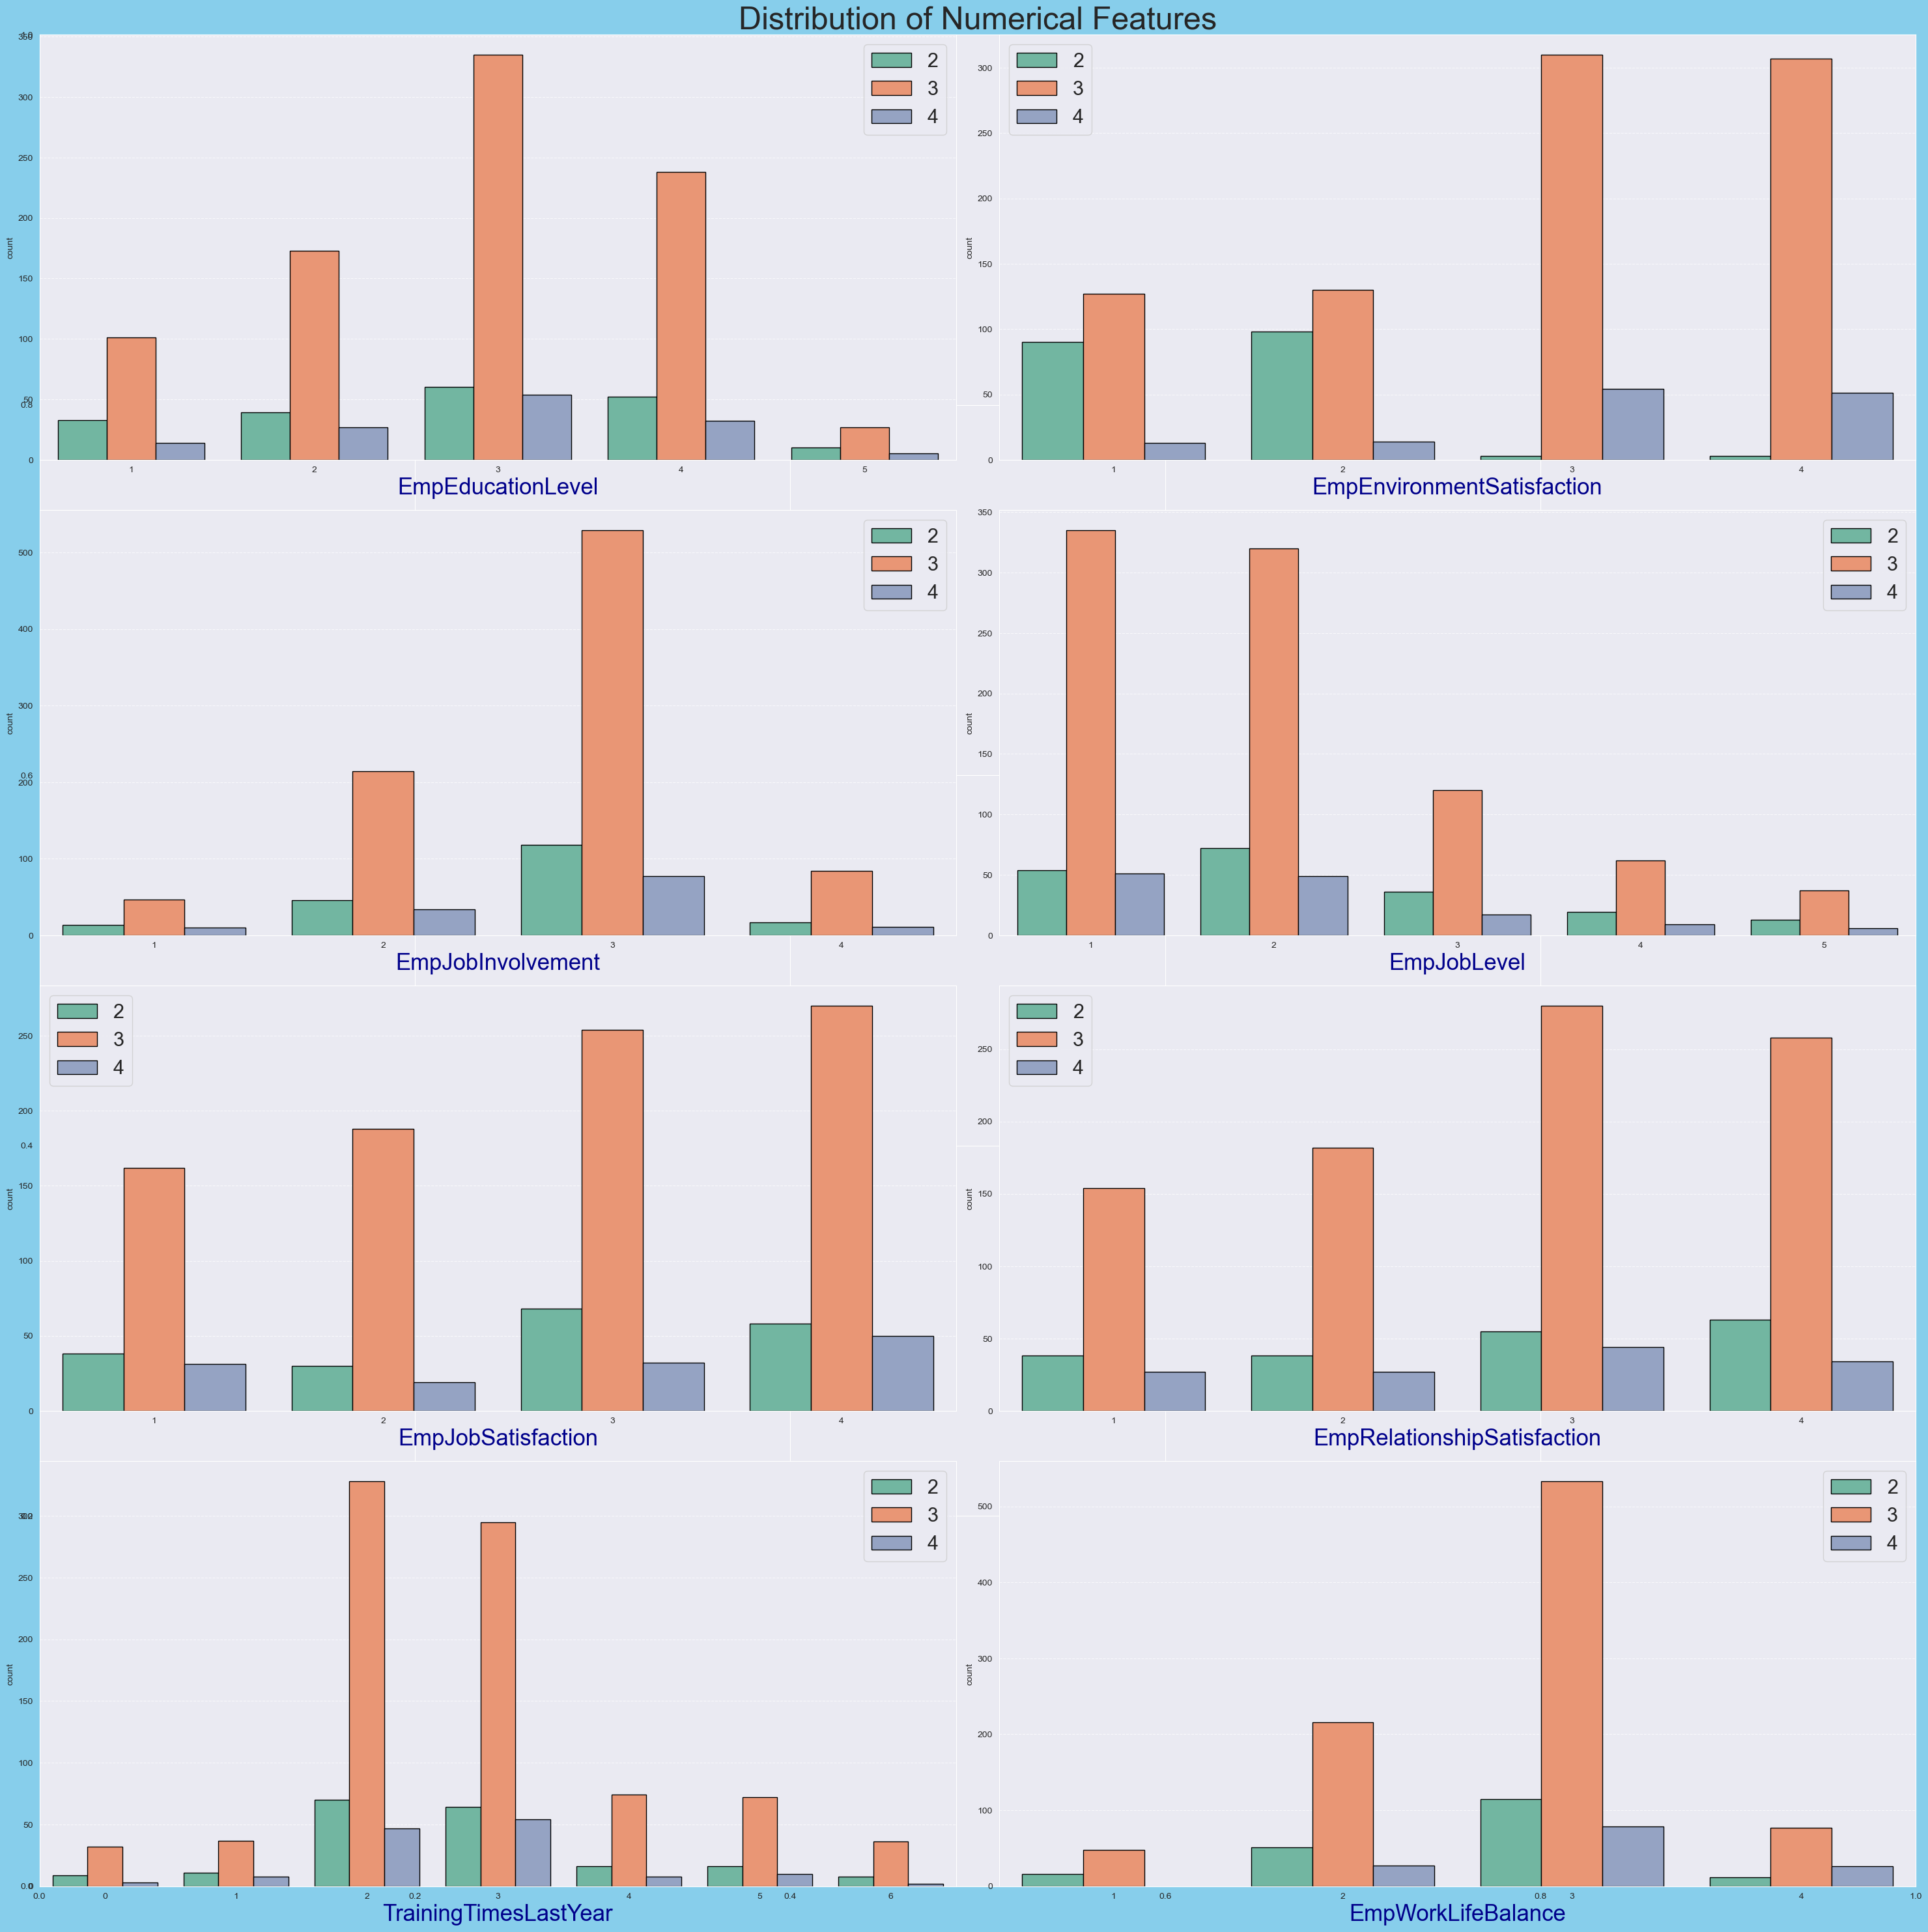

In [56]:

k=1
plt.figure(figsize=(30,30),facecolor='skyblue')
plt.title('Distribution of Numerical Features',fontsize = 35)
for i in num_7:
    plt.subplot(4,2,k)
    sns.countplot(x=emp[i],palette='Set2',edgecolor = 'black',hue=emp.PerformanceRating)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(fontsize = 22)
    plt.xlabel(i,fontsize = 25,color = 'darkblue')
    k=k+1

plt.tight_layout()
plt.show()
    

##  Feature-wise Breakdown: PerformanceRating Analysis

The charts below dissect how various employee attributes play out across different **Performance Ratings (2 - Low, 3 - Average, 4 - High)**.

---

### 1. EmpEducationLevel
- Employees with **education levels 3 and 4** dominate the rating spectrum.
- **Top performers (Rating = 4)** usually hold moderate to higher education.
- But education alone doesn‚Äôt guarantee excellence ‚Äî some highly educated folks still chill at Rating 3.

---

### 2. EmpEnvironmentSatisfaction
- Most employees rate their work environment **satisfactorily (3 or 4)**.
- However, there‚Äôs no dramatic spike in **Performance Rating = 4** with high environment satisfaction.
- Conclusion? A nice environment doesn‚Äôt always make a ninja.

---

### 3. EmpJobInvolvement
- This one‚Äôs a goldmine.
- **Rating = 4** is significantly higher for those with **Job Involvement = 3**.
- So, being involved in your work (but not overly consumed) might be the secret sauce.

---

### 4. EmpJobLevel
- Surprisingly, **high performers exist even in lower job levels (1 & 2)**.
- Promotions aren‚Äôt always the prize ‚Äî some legends shine from the bottom of the ladder.

---

### 5. EmpJobSatisfaction
- **Satisfaction Level = 3 or 4** sees more **Rating = 4** employees.
- Dissatisfied employees (levels 1 & 2) rarely achieve the top tier.
- So yes, *happy employee, productive employee* isn‚Äôt just HR mumbo jumbo.

---

### 6. EmpRelationshipSatisfaction
- Most people scoring a **Rating = 4** have moderate to high relationship satisfaction.
- Good work relationships may not directly fuel performance, but they sure help maintain harmony.

---

### 7. TrainingTimesLastYear
- Huge twist: **Rating = 4** folks aren't training much.
- Most of them have 0‚Äì1 training sessions. Are they naturally gifted or just skipping the lectures? ü§∑‚Äç‚ôÇÔ∏è

---

### 8. EmpWorkLifeBalance
- **Work-Life Balance = 3** is where most **top-rated performers** reside.
- Too much balance (level 4) or zero balance (level 1) isn't ideal.

---



# Multivariate Analysis

-Checking the Relationship between 2 features with respect to target features

In [59]:
list(emp.columns)

['Age',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'OverTime',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition',
 'PerformanceRating']

#### Checking the Relationship between Age and Total Work Experience with Respect to Target Feature

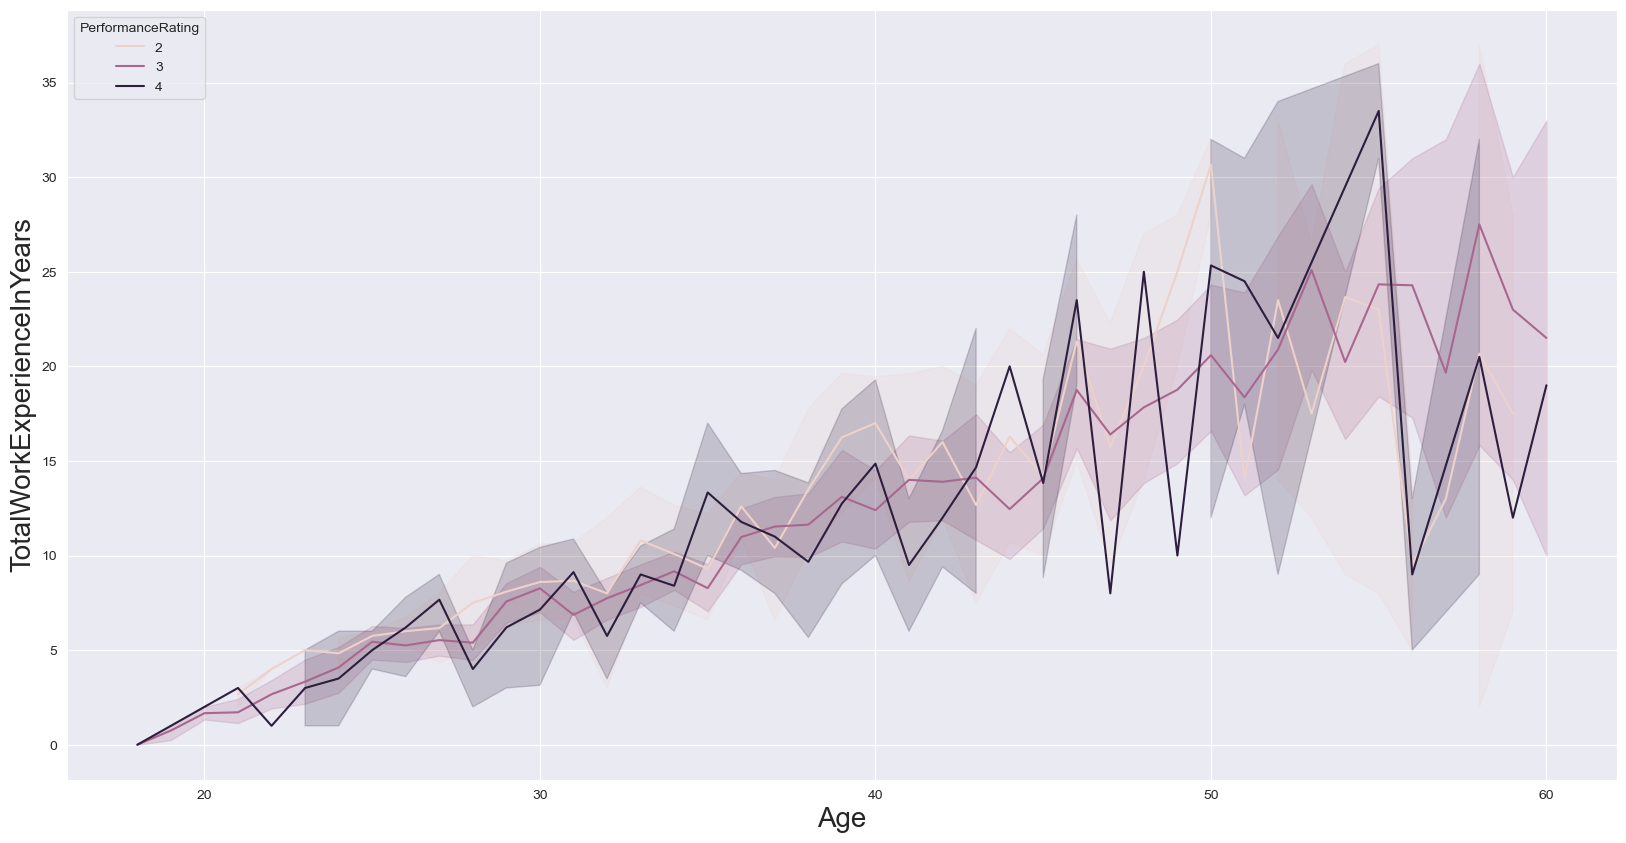

In [61]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',hue=emp.PerformanceRating,data=emp)
plt.xlabel('Age',fontsize=20)
plt.ylabel('TotalWorkExperienceInYears',fontsize=20)
plt.show()

##  Age vs Work Experience (Coloured by Performance Rating)

This line plot shows how **Total Work Experience in Years** varies with **Age**, with the curves colored by **Performance Rating (2, 3, 4)**.

---

### üß† Interpretation:

- **Linear Relationship**: There's a pretty steady rise ‚Äî as age increases, so does experience (duh, unless you're Benjamin Button).
  
- **Performance Ratings**:
  - The lines for **Ratings 3 & 4** almost **overlap throughout**, showing not much difference in work experience between average and high performers.
  - Around **age 40+**, the **Rating = 4 line spikes more sharply**, suggesting that **seasoned veterans** tend to be high performers ‚Äî but only after a certain age.

- **Volatility & Uncertainty**:
  - The **shaded regions** show confidence intervals ‚Äî and they start to get **wider after age 35**, especially for Ratings 3 & 4.
  - Translation? There's **less consistency in performance** and experience among older employees ‚Äî maybe due to career switches, sabbaticals, or burnout?

---



#### 2.Check the relationship between Gender & Number Companies Worked with respect to target feature

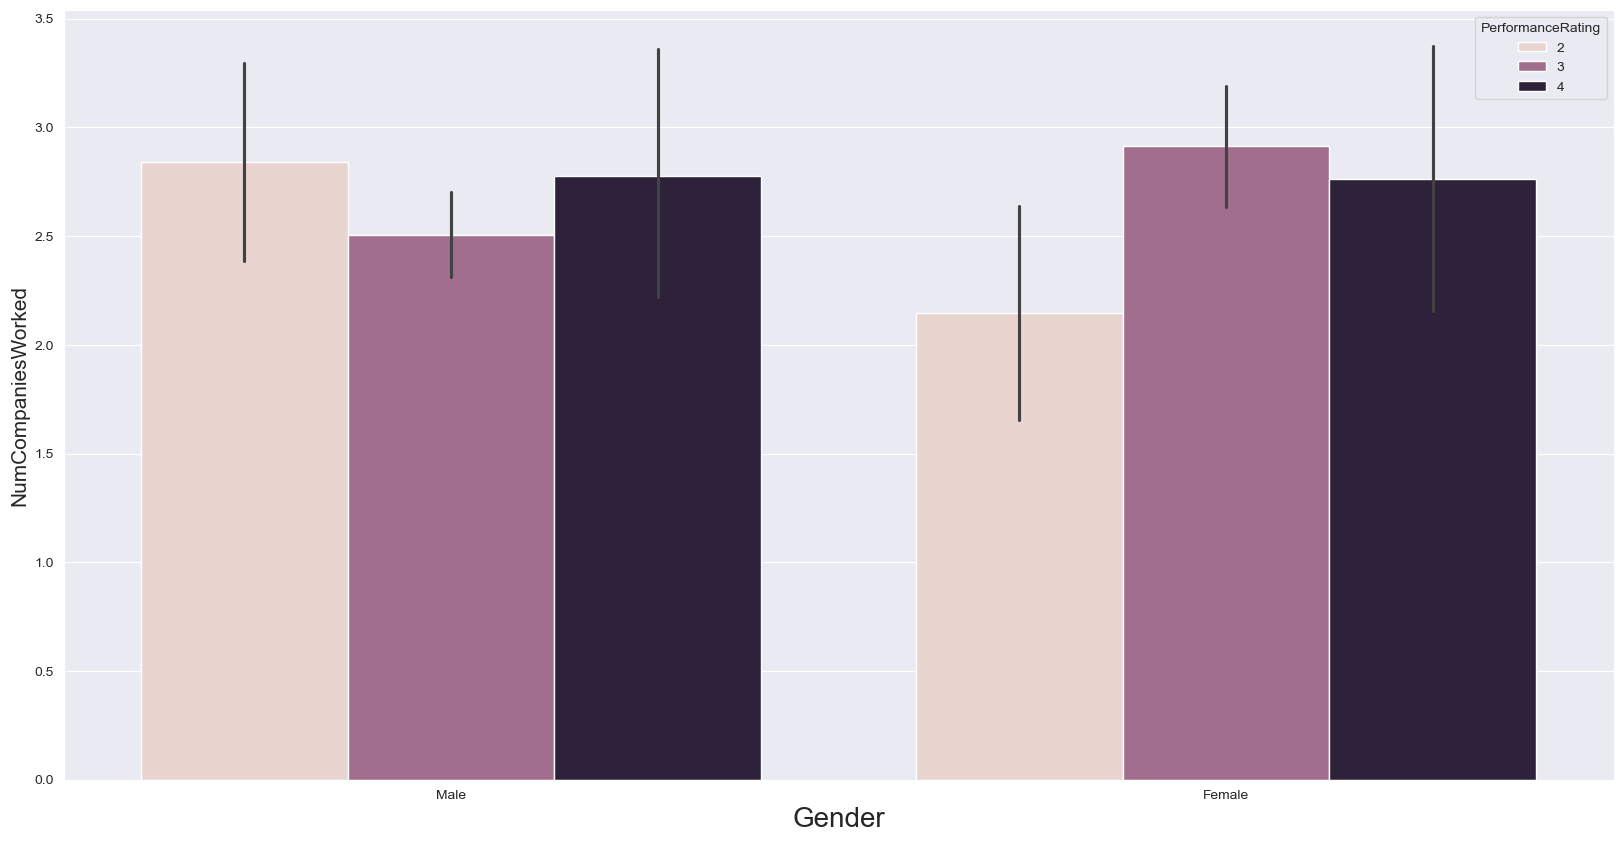

In [64]:
plt.figure(figsize=(20,10))
sns.barplot(x='Gender',y='NumCompaniesWorked',hue=emp.PerformanceRating,data=emp)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()


**Observation:**

- If the gender is male and no of companies work is increses that time most of the performance rating is 2 & 4.
- If female work in less no companies that time performance rating is 2.
- 3 & 4 performance rating in female increase if the no of compaines worked is increses.

#### 3.Check the relationship between MaritalStatus & EmpLastSalaryHikePercent with respect to target feature

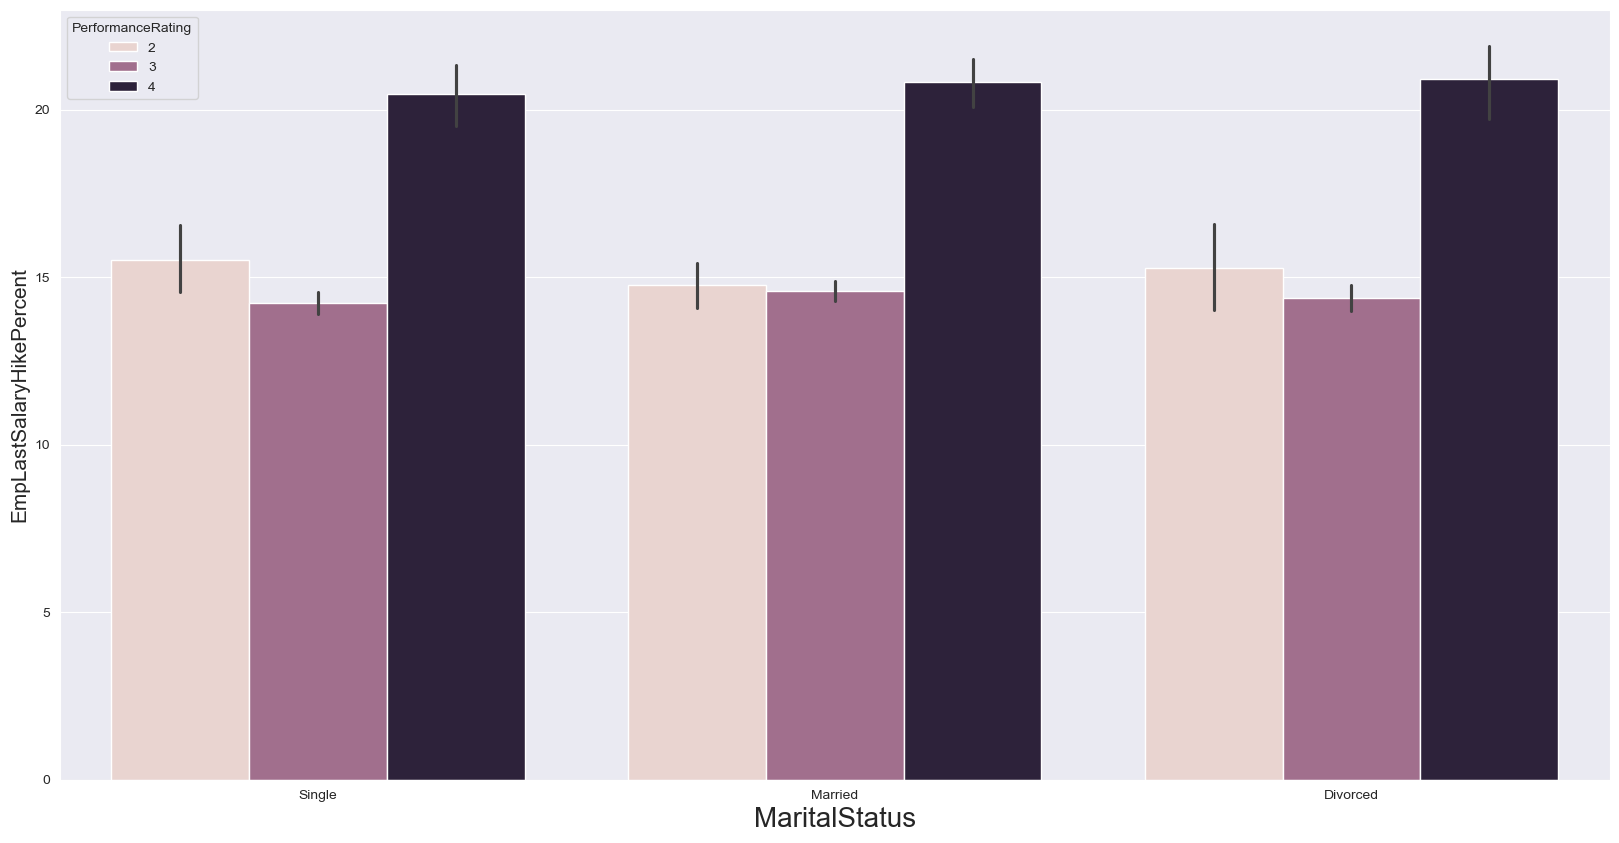

In [67]:
plt.figure(figsize=(20,10))
sns.barplot(x='MaritalStatus',y='EmpLastSalaryHikePercent',hue=emp.PerformanceRating,data=emp)
plt.xlabel('MaritalStatus',fontsize=20)
plt.ylabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()

### üéØ Observations:

1. **Rating 4**   
   Across all marital statuses ‚Äî Single, Married, Divorced ‚Äî employees with **Performance Rating = 4** consistently received the **highest salary hikes**, all above 20%.  
   ‚Üí The company clearly *rewards excellence*, regardless of your ring status.

2. **Rating 2 vs Rating 3: Basically a tie** 
   Employees with **Ratings 2 and 3** received fairly **similar hike percentages**, floating around 13‚Äì14%, showing **limited reward differentiation** for average vs below-average performers.

3. **Marital Status**   
   Whether you're **Single**, **Married**, or **Divorced**, the average hike doesn‚Äôt change drastically *within the same performance level*.  



**Observation:**

- If the employee enviorment satisfaction is high that time performance rating is 3 & 4 in all buisness travel frequency.
- Low employee enviorment satisfaction has 2 performance rating in all buisness travel frequency.

#### 5.Check the relationship between Attrition & YearsWithCurrManager with respect to target feature

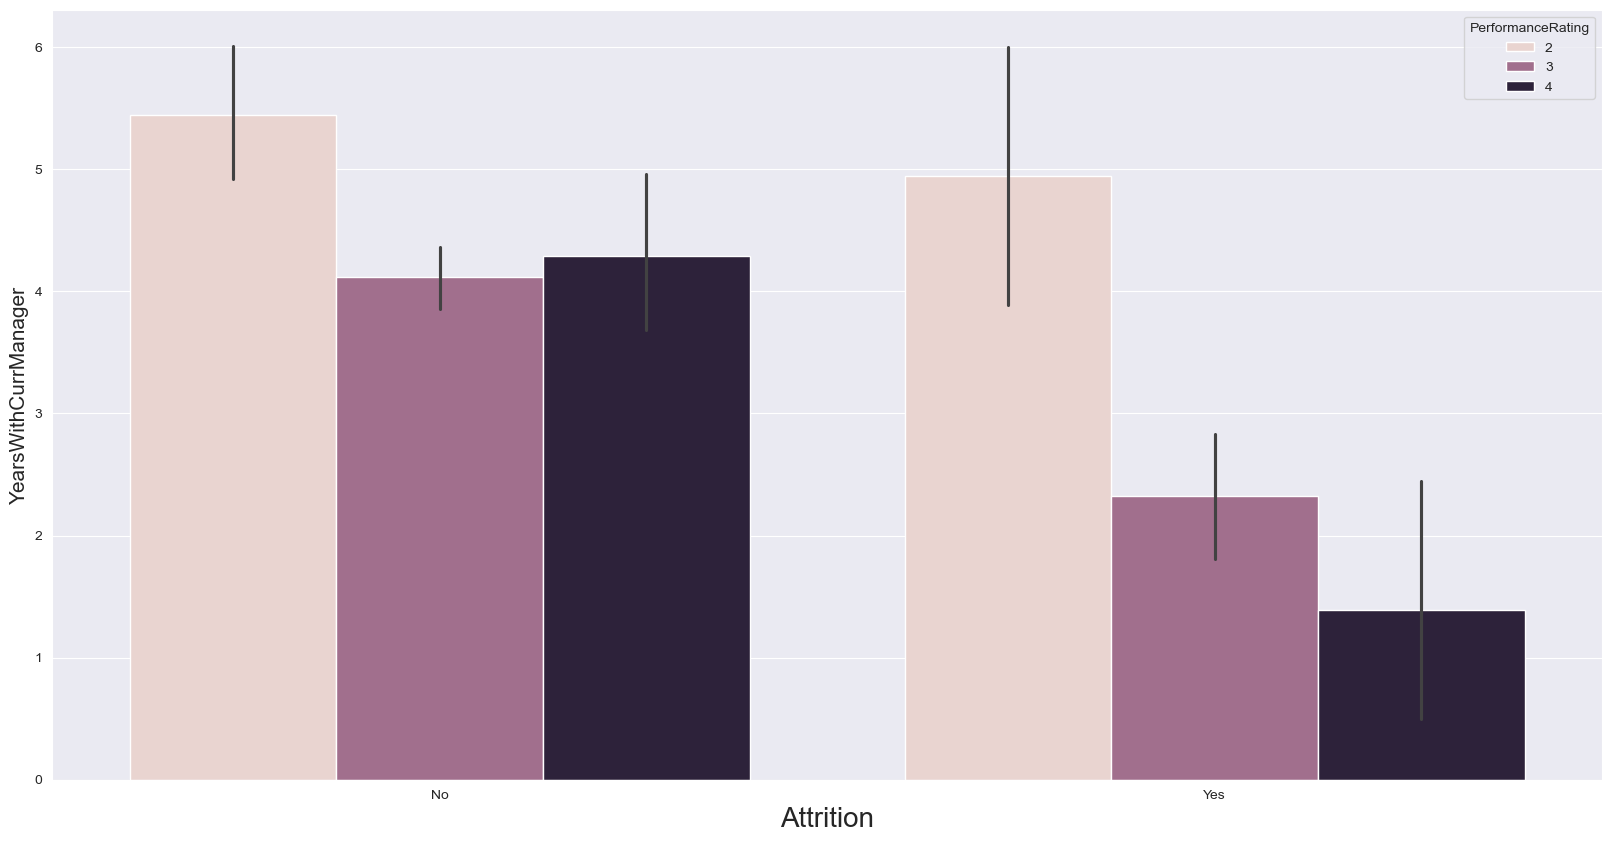

In [71]:

plt.figure(figsize=(20,10))
sns.barplot(x='Attrition',y='YearsWithCurrManager',hue=emp.PerformanceRating,data=emp)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('YearsWithCurrManager',fontsize=15)
plt.show()

##  Insight: Relationship between Attrition & YearsWithCurrManager (w.r.t PerformanceRating)

This barplot visualizes the relationship between **Attrition** and **Years With Current Manager**, while also factoring in the **Performance Rating** of employees.

###  Observations:

1. **Employees who didn't leave ("Attrition = No")**:
   - Have **more years with their current manager** on average (~5‚Äì6 years).
   - Regardless of their performance rating (2, 3, or 4), they tend to stay longer with the same manager.
   - Performance Rating **doesn't drastically affect retention** if the manager relationship is long.

2. **Employees who left ("Attrition = Yes")**:
   - Tend to have **fewer years with their current manager** (~2‚Äì3 years or even less).
   - The attrition group with **highest performance rating (4)** has the **lowest average years with current manager**.
     - This may indicate **high performers leaving early**, possibly due to **lack of recognition, poor leadership match, or better external opportunities**.

3. **General Trend**:
   - There is a clear **positive correlation between employee retention and tenure with the same manager**.
   - Consistent managerial relationships may contribute to **employee loyalty and lower attrition**.
   - Employees who leave typically have **shorter manager tenure**, regardless of performance.

> **Longer tenure with a manager is associated with lower attrition**, especially when combined with consistent performance ratings. The company should focus on **manager-employee relationship stability** to enhance retention ‚Äî particularly for **top-performing employees**.


#### 6.Check the relationship between EducationBackground & ExperienceYearsInCurrentRole with respect to target feature

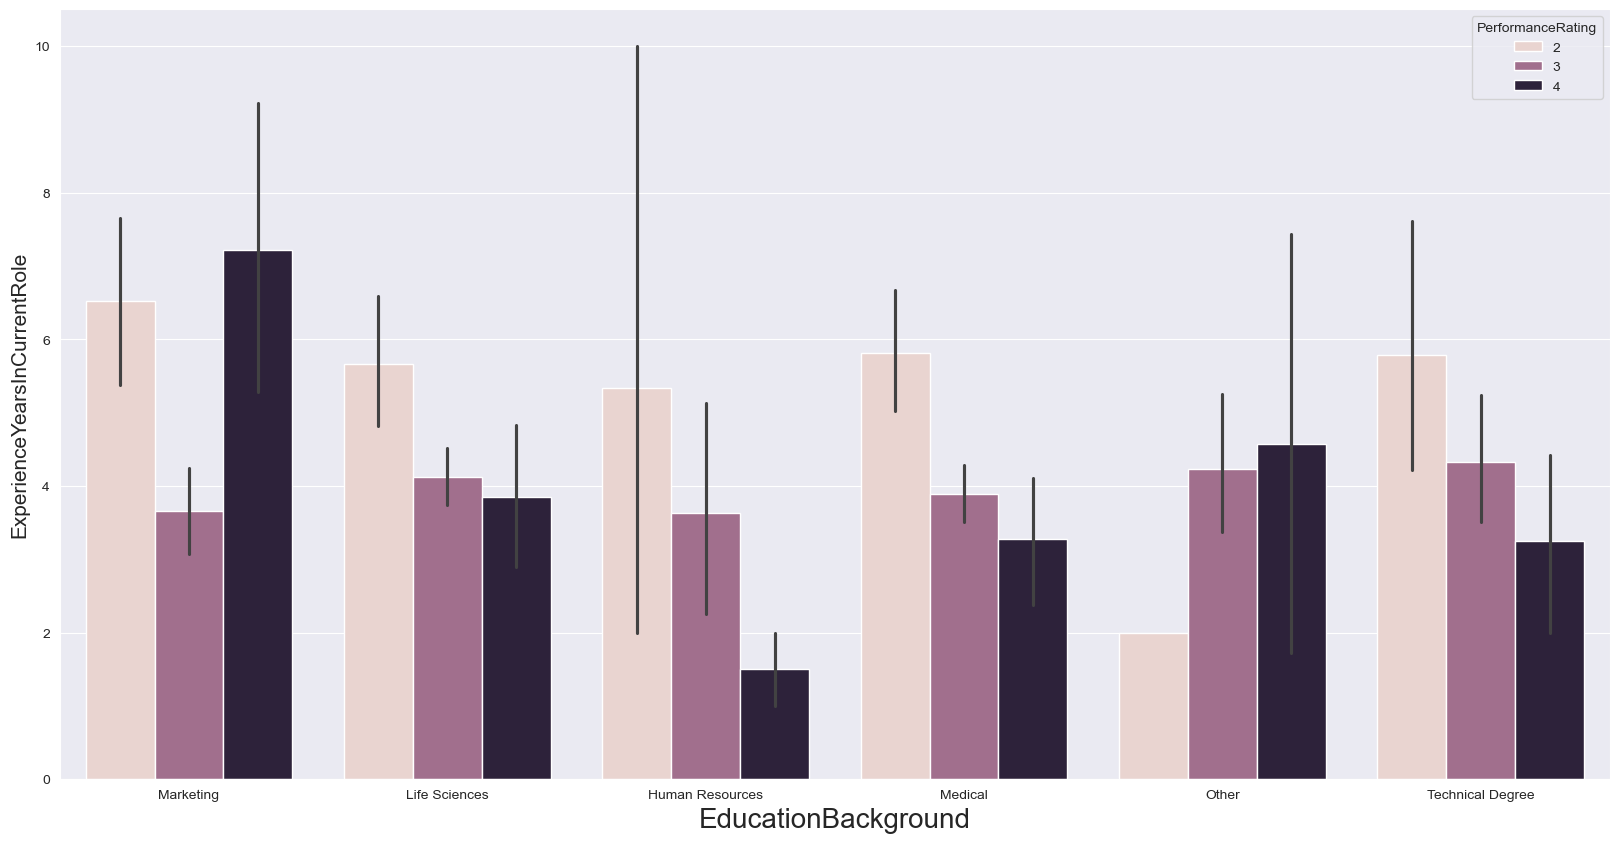

In [74]:
plt.figure(figsize=(20,10))
sns.barplot(x='EducationBackground',y='ExperienceYearsInCurrentRole',hue=emp.PerformanceRating,data=emp)
plt.xlabel('EducationBackground',fontsize=20)
plt.ylabel('ExperienceYearsInCurrentRole',fontsize=15)
plt.show()

##  Insight: Education Background vs Experience in Current Role (by Performance Rating)

This barplot analyzes how **EducationBackground** influences **ExperienceYearsInCurrentRole**, broken down by **PerformanceRating** (2, 3, 4).

---

###  Feature-by-Feature Breakdown:

####  Marketing:
- **Rating 4** candidates have **longest experience** in their current role (~7‚Äì8 years).
- **Rating 2 & 3** show significantly less experience.
- **High-performing marketers** tend to be more seasoned.

####  Life Sciences:
- Experience remains **fairly balanced across ratings**, but **slightly lower** than Marketing.
- **Not a strong indicator** of tenure by itself.

####  Human Resources:
- **Large variance** for Rating 4, indicating **inconsistent tenure** among high performers.
- **Rating 3** appears more stable with **~4‚Äì5 years** average.
- HR might lack a **clear experience-performance link**.

####  Medical:
- **Rating 4** again leads in tenure (~6 years).
- Lower ratings have **shorter average experience**.
- Indicates that in the **Medical field, experience and performance are aligned**.

####  Other:
- **Rating 3 & 4** hold similar experience levels (~5 years).
- Rating 2 surprisingly high ‚Äî **outlier behavior**.
- Needs deeper analysis (maybe managerial bias or sector anomaly?).

####  Technical Degree:
- **Stable and balanced experience across ratings**.
- High performers don't necessarily have more experience ‚Äî **performance may rely on technical skills** over tenure.

---

###  Final Insight:
> Employees with a **Marketing** or **Medical** education background who perform well tend to have **higher tenure** in their roles, suggesting **strong retention or career stability**. On the other hand, **Human Resources** shows erratic behavior for high performers, and **Technical Degree** holders seem to **perform well irrespective of experience**.

 HR strategies could:
- Enhance retention in HR by understanding root causes of high performer churn.
- Leverage high-performing Tech


#### 7.Check the relationship between OverTime & DistanceFromHome with respect to target feature

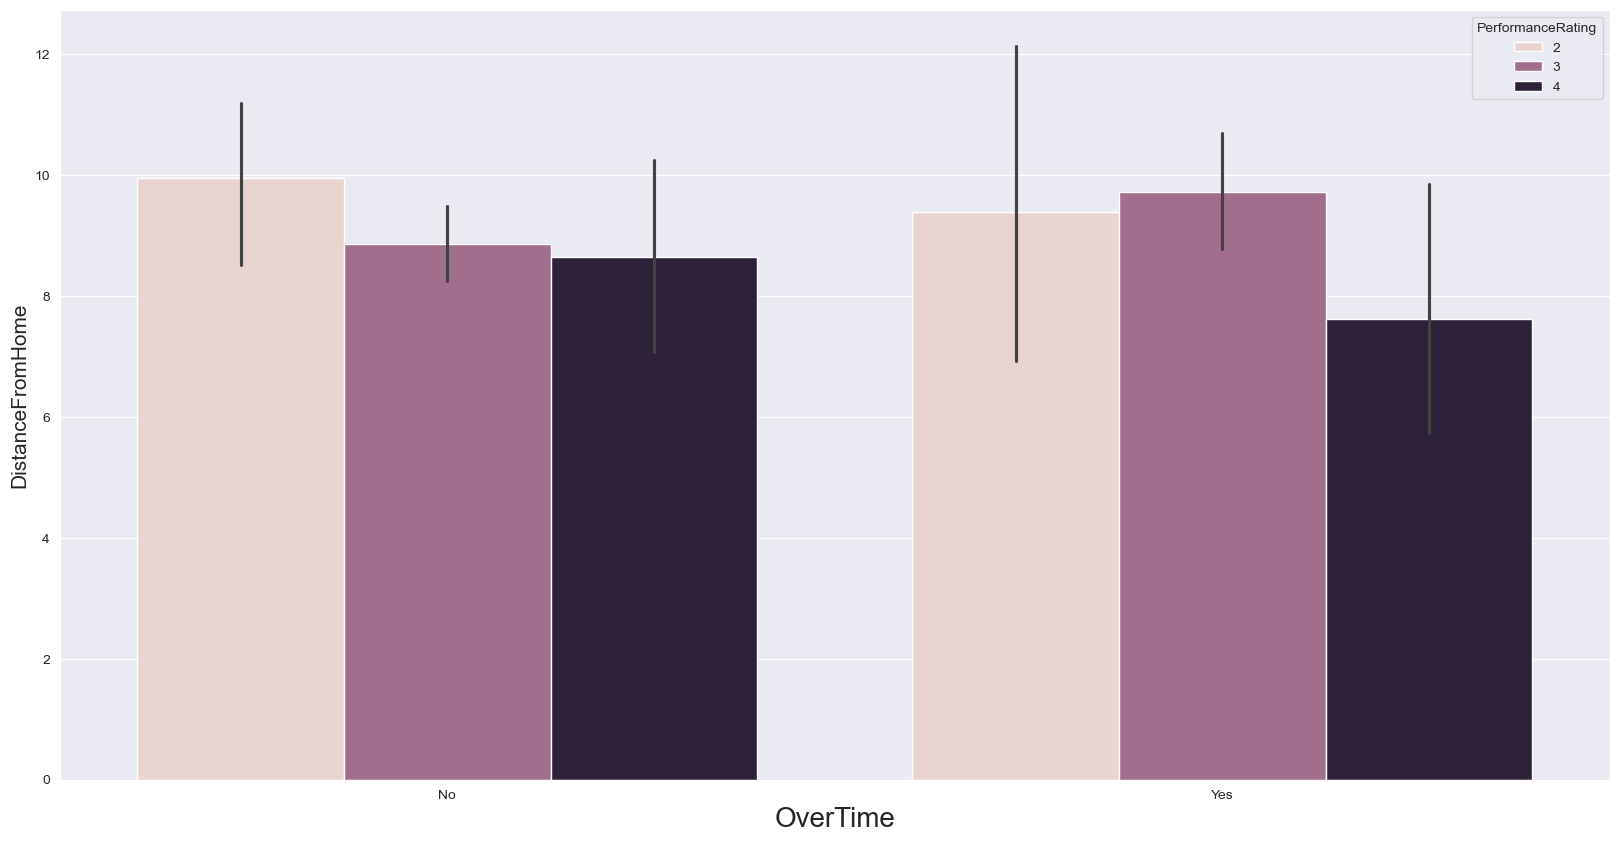

In [77]:
plt.figure(figsize=(20,10))
sns.barplot(x='OverTime',y='DistanceFromHome',hue=emp.PerformanceRating,data=emp)
plt.xlabel('OverTime',fontsize=20)
plt.ylabel('DistanceFromHome',fontsize=15)
plt.show()

##  Insight: Overtime vs Distance From Home (Grouped by Performance Rating)

This visualization reveals the relationship between **OverTime**, **DistanceFromHome**, and **PerformanceRating**.

---

###  Key Observations:

####  Employees who DO NOT work overtime:
- **Performance Rating 2** shows the **highest average distance (~10 km)**.
- **Ratings 3 and 4** show **slightly lesser distance**, hovering around **8.5‚Äì9 km**.
- Suggests that long commutes **may impact performance negatively** for non-overtime workers.

####  Employees who DO work overtime:
- **Rating 3** has the **highest average distance (~9.5‚Äì10 km)** among overtime workers.
- **Rating 4** shows the **lowest distance (~8 km)**.
- High-performing overtime employees **tend to live closer**, suggesting proximity aids better productivity or willingness for extra work.

---



#### 8.Check the relationship between EmpDepartment & TrainingTimesLastYear with respect to target feature

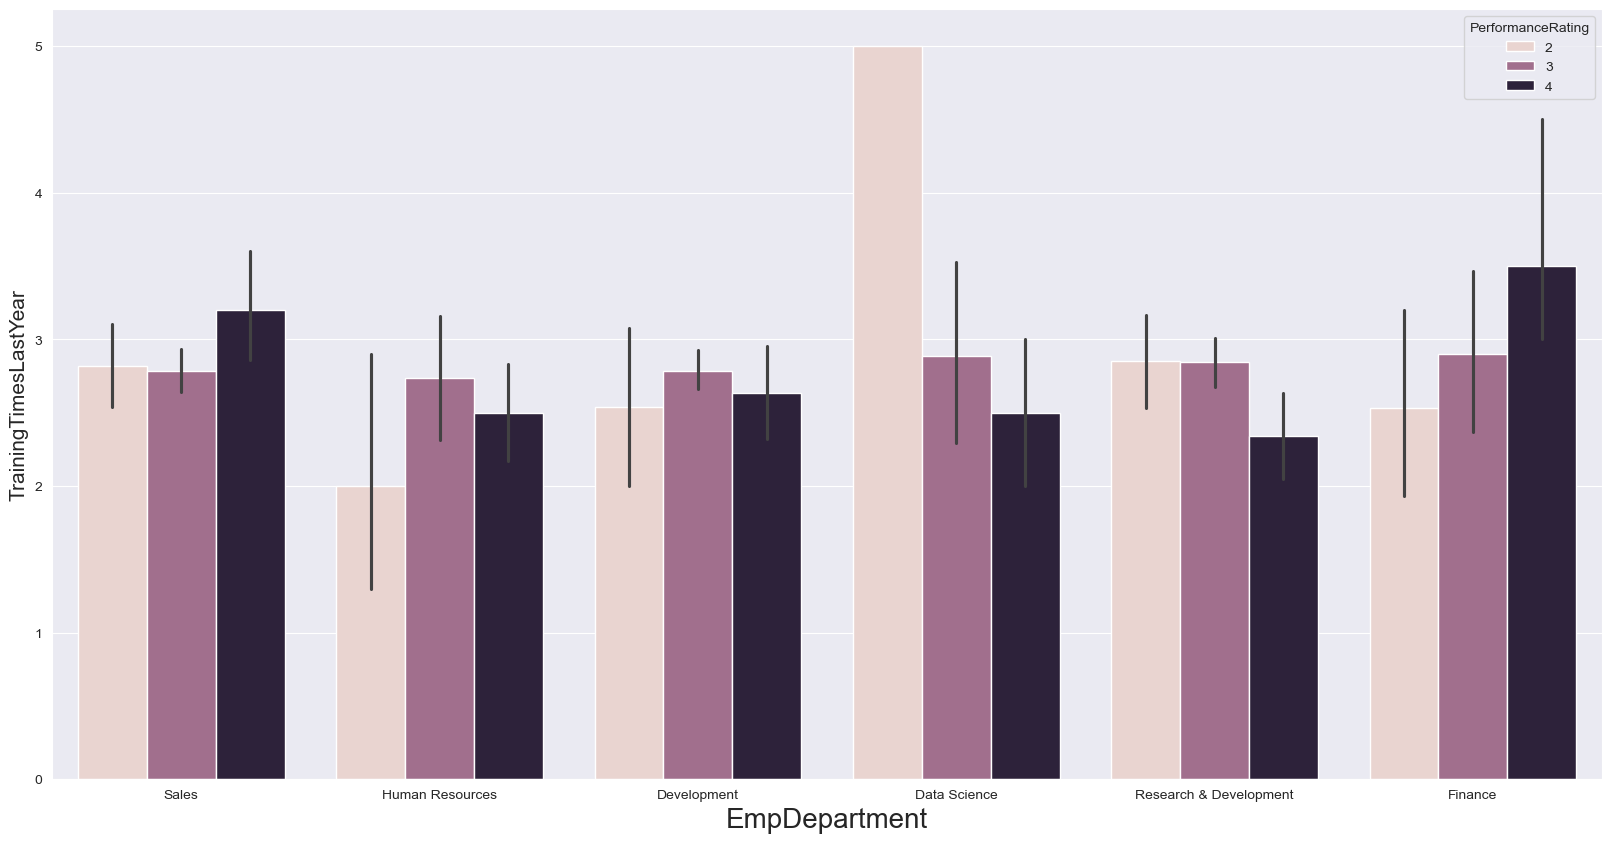

In [80]:
plt.figure(figsize=(20,10))
sns.barplot(x='EmpDepartment',y='TrainingTimesLastYear',hue=emp.PerformanceRating,data=emp)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('TrainingTimesLastYear',fontsize=15)
plt.show()

##  Insight: EmpDepartment vs TrainingTimesLastYear (Grouped by Performance Rating)

This barplot explores how **different departments** vary in terms of **training times last year**, and how this relates to their **performance ratings**.

---

###  Department-Wise Observations:

####  Sales
- Training time increases slightly as performance rating increases.
- High-performing employees in Sales (**Rating 4**) seem to **benefit from additional training**.

####  Human Resources
- Minimal difference across performance ratings.
- **Low training frequency** overall may indicate a **mature or static process** in HR functions.
- Performance doesn‚Äôt appear to correlate strongly with training.

####  Development
- Training times are fairly **consistent** across all ratings.
- Slight dip for Rating 4 might hint that **top performers are self-sufficient or already highly skilled**.

####  Data Science
- **Sharp spike** in training time for Rating 2.
- Might suggest **underperformers are being heavily trained** to boost skills.
- Interestingly, high performers receive **less training**, which might imply they‚Äôre already ahead.

####  Research & Development
- Shows a **gradual decrease** in training from Rating 2 to 4.
- Indicates **better performers may require less formal training**, possibly relying on experience or innovation.

####  Finance
- **Clear upward trend**: as performance rating increases, so does training time.
- Suggests that **training is directly supporting high performance** in this department.
- Could be a model strategy for other departments.

---



#### 10.Check the relationship between Attrition & NumCompaniesWorked with respect to target feature

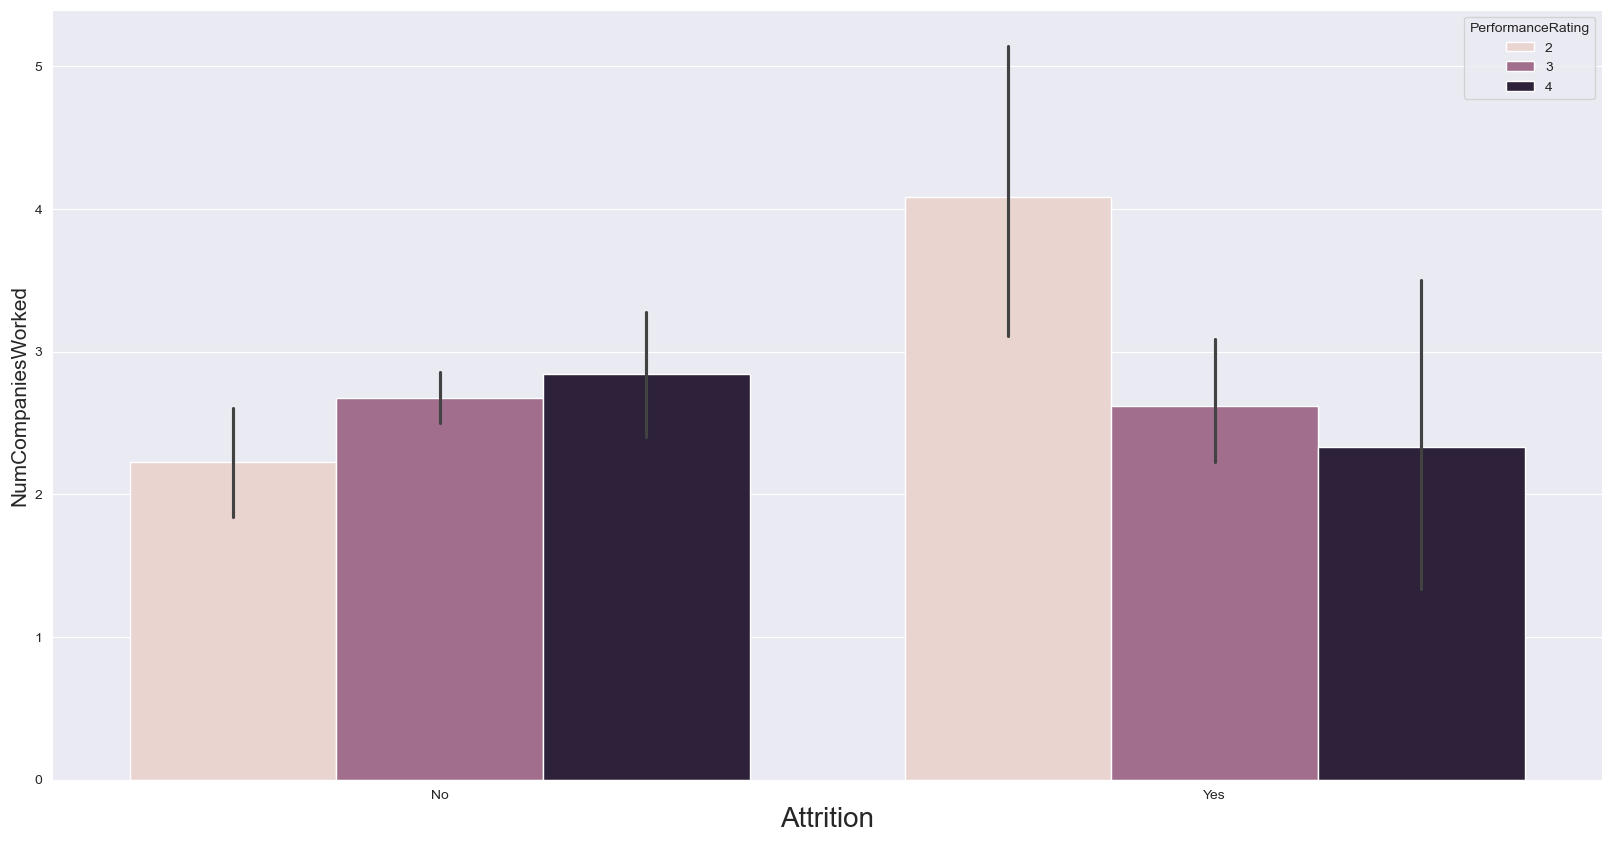

In [83]:
plt.figure(figsize=(20,10))
sns.barplot(x='Attrition',y='NumCompaniesWorked',hue=emp.PerformanceRating,data=emp)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()

##  Insight: Attrition vs Number of Companies Worked (Grouped by Performance Rating)

This visualization reveals how **employee attrition** relates to the **number of companies an employee has worked with**, segmented by their **performance rating**.

---

###  Key Observations:

####  Employees Who Did **Not** Leave (Attrition = No):
- Their average number of companies worked with is **around 2.5‚Äì3**.
- Across all performance ratings (2, 3, and 4), this group shows **stability** in career path.
- This suggests that **low job-hopping behavior** aligns with employee **retention**.

####  Employees Who **Left** (Attrition = Yes):
- **Noticeably higher average** for Rating 2 employees (approx. 4.5).
- This indicates that **low-performing employees who leave tend to have a history of job-hopping**.
- Ratings 3 and 4 in this group have **lower averages (~3 or below)** than Rating 2, implying that **even high performers may leave, but often with more stable histories**.

---






#### PERCENT COUNT IN EMPLOYEE DEPARTMENT WITH PERFORMANCE RATING

In [86]:
percent = pd.crosstab(emp["PerformanceRating"], emp["EmpDepartment"], margins=True,normalize=True)
# round(percent.multiply(100),2)
round(percent*100,2)

EmpDepartment      Data Science  Development  Finance  Human Resources  \
PerformanceRating                                                        
2                          0.08         1.08     1.25             0.83   
3                          1.42        25.33     2.50             3.17   
4                          0.17         3.67     0.33             0.50   
All                        1.67        30.08     4.08             4.50   

EmpDepartment      Research & Development  Sales     All  
PerformanceRating                                         
2                                    5.67   7.25   16.17  
3                                   19.50  20.92   72.83  
4                                    3.42   2.92   11.00  
All                                 28.58  31.08  100.00

#### Displaying the HeatMap to showcase the Correlation

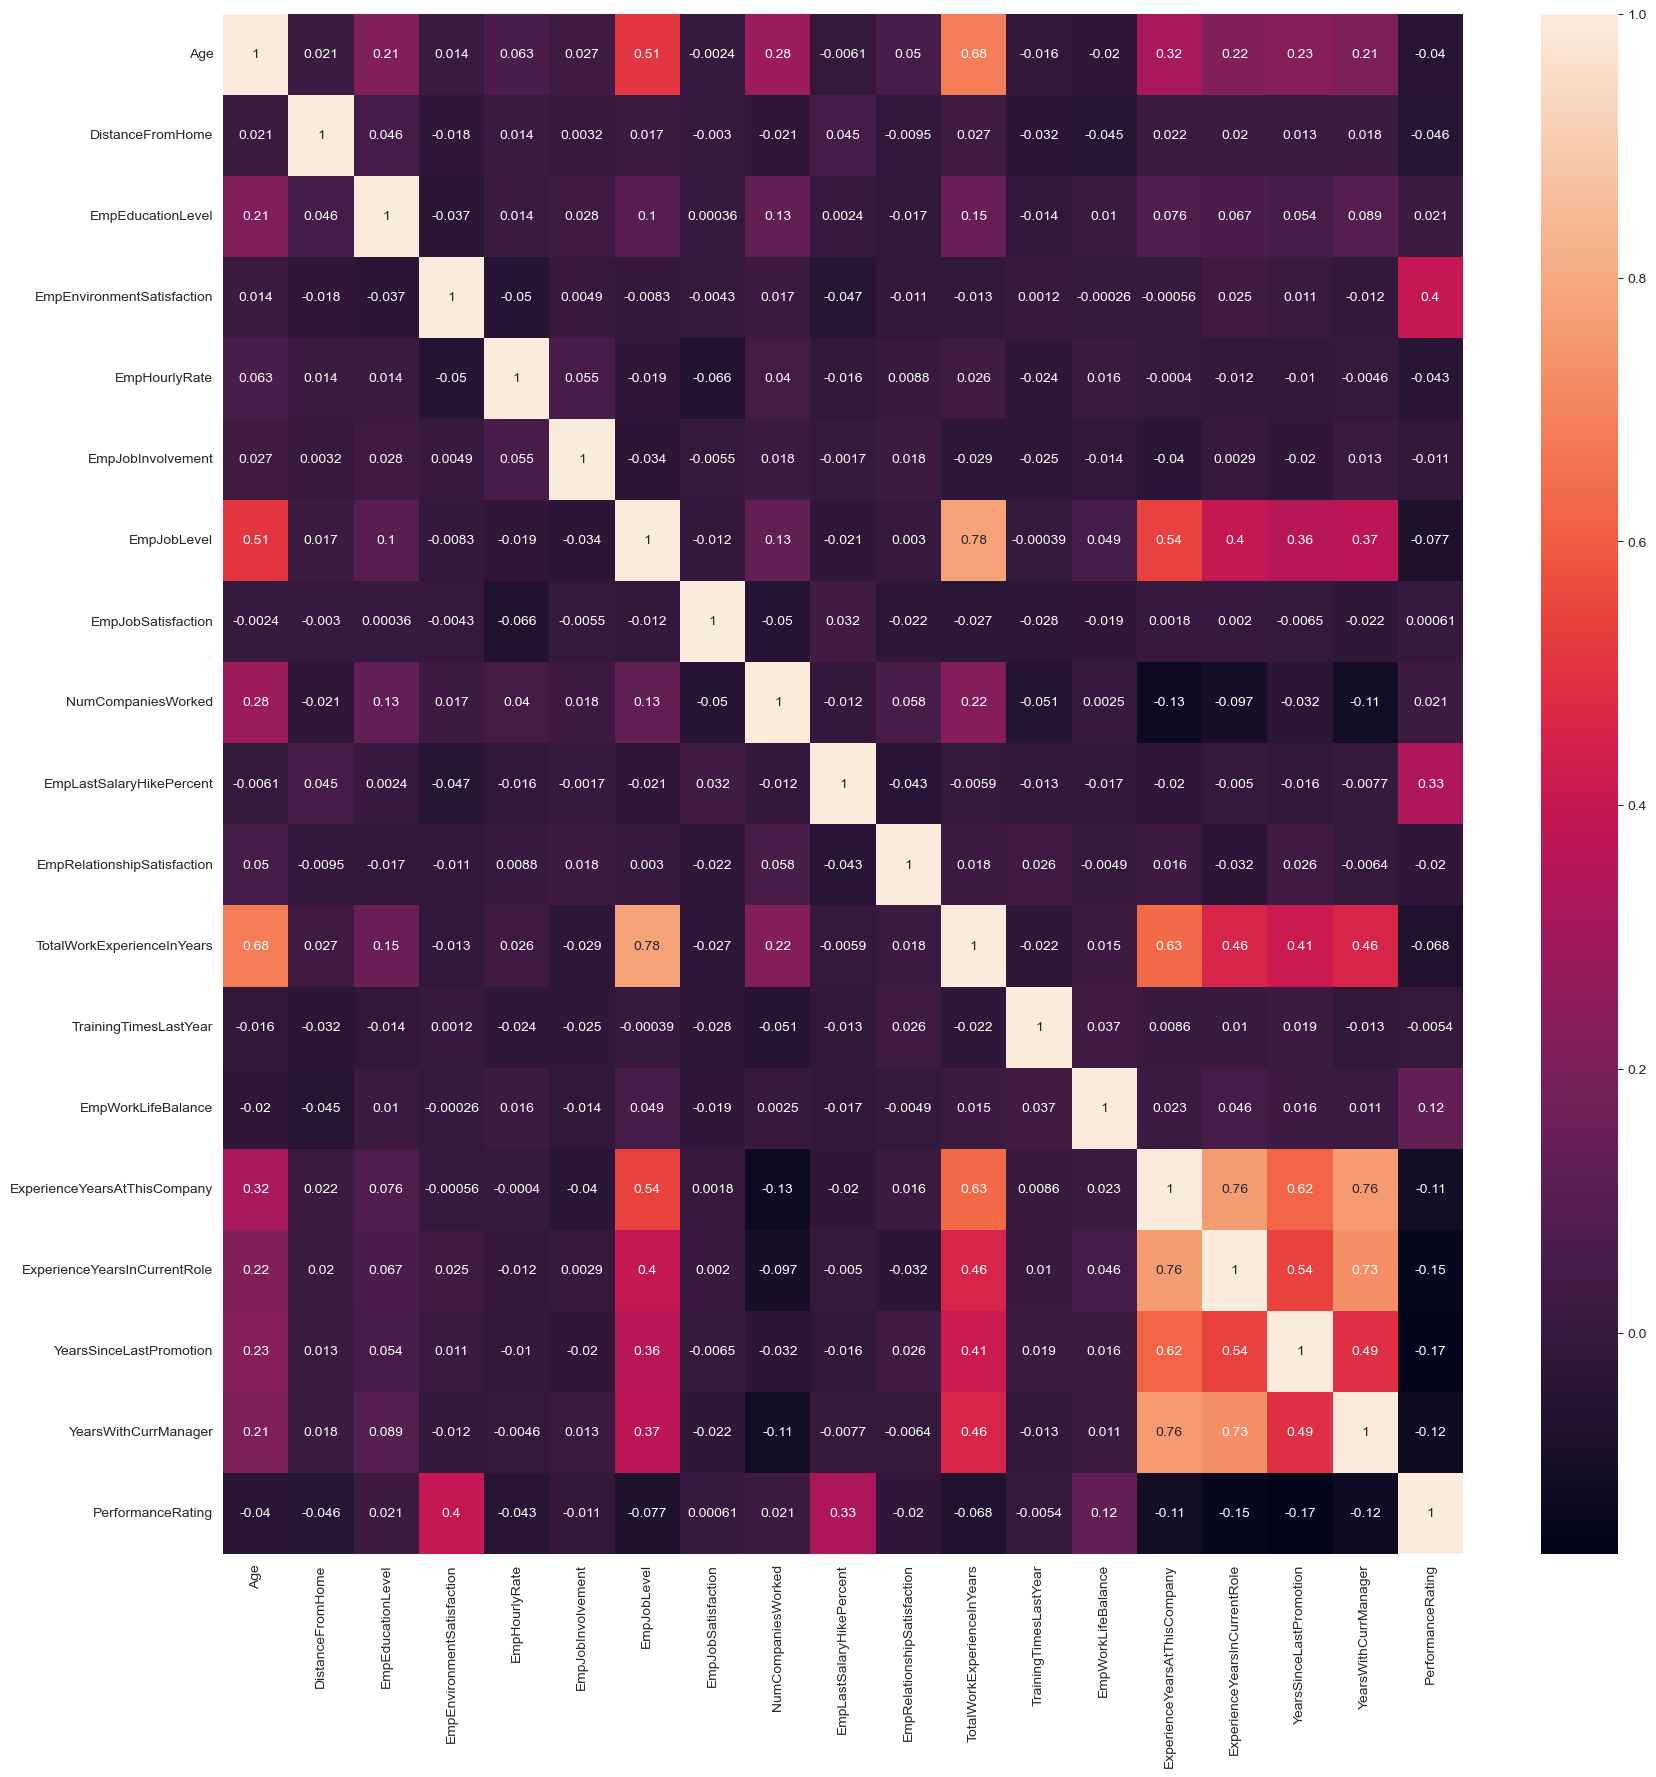

In [88]:

plt.figure(figsize=(20,20))
sns.heatmap(emp.corr(numeric_only=True),annot = True)
plt.show()

#### Finding the Top 3 correlation in the Graph

Top 5 features most correlated with PerformanceRating:
EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
YearsSinceLastPromotion         0.167629
ExperienceYearsInCurrentRole    0.147638
EmpWorkLifeBalance              0.124429
Name: PerformanceRating, dtype: float64


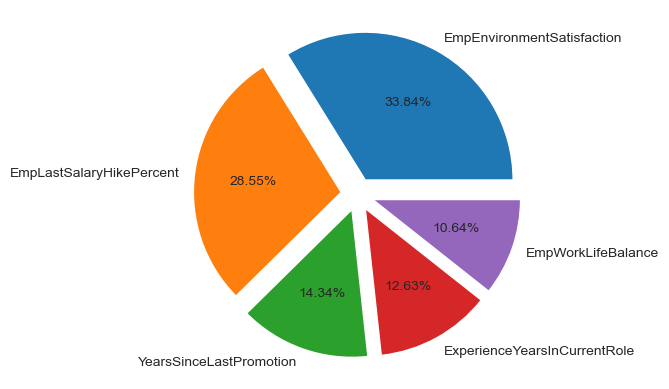

In [90]:
# Calculate correlation matrix for numeric columns
corr = emp.corr(numeric_only=True)

# Get absolute correlation with PerformanceRating
top_corr = corr['PerformanceRating'].abs().sort_values(ascending=False)

# Show top 5 correlated features (excluding itself if needed)
top_5 = top_corr.drop('PerformanceRating').head(5)

# Display result
print("Top 5 features most correlated with PerformanceRating:")
print(top_5)

# showcasing the Pie Chart
plt.pie(top_5,labels=top_5.index,autopct='%1.2f%%',explode=[0.11]*5)
plt.show()

# Feature Selection and Engineering

- **Selected Features**: Based on initial domain understanding and data types, we focused on features like `MonthlyIncome`, `YearsAtCompany`, `Attrition`, and other categorical variables.
- **Transformations**: Standardization and normalization were applied where needed (e.g., using MinMaxScaler or StandardScaler).
- **Correlation Analysis**: Correlation matrix and pairplots were explored to detect multicollinearity and relationships between numerical features.


### Converting the Categorical to Numerical Columns

In [93]:
list(emp.select_dtypes('object'))

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

#### Technique Used :
- **1.Mannual Encoding :** Mannual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.


**Just Tried to find out the Unique values in each columns**

In [96]:
for i in emp.select_dtypes('object').columns:
    print (f'The unique values of {i} are : {emp[i].value_counts()} \n -----------------------------')

The unique values of Gender are : Gender
Male      725
Female    475
Name: count, dtype: int64 
 -----------------------------
The unique values of EducationBackground are : EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64 
 -----------------------------
The unique values of MaritalStatus are : MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64 
 -----------------------------
The unique values of EmpDepartment are : EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64 
 -----------------------------
The unique values of EmpJobRole are : EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Re

**We Separated the Categorcial Columns, we want into the columns we want to One Hot Encode and Label Encode**

In [98]:
OHE_columns = ['EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency']
Label_columns = ['Gender','OverTime','Attrition']

#### Mapping the Features  with 2 unique values as 0 and 1 using the Map Function(Label Encoding)

In [100]:
emp['Gender'] = emp['Gender'].map({'Male' :1,'Female':0})
emp['OverTime'] = emp['OverTime'].map({'No' : 0,'Yes' : 1})
emp['Attrition'] = emp['Attrition'].map({'No' : 0,'Yes' : 1})

### We took tke the OHE columns and One Hot Encoded them and dropped the first values
  #### and later Deleted the Normal columns selected for the OHE

In [102]:
encoded_df = pd.get_dummies(emp[OHE_columns], drop_first=True, dtype=int)

emp.drop(columns=OHE_columns, inplace=True)

emp = pd.concat([emp, encoded_df], axis=1)

In [103]:
emp

Age  Gender  DistanceFromHome  EmpEducationLevel  \
0      32       1                10                  3   
1      47       1                14                  4   
2      40       1                 5                  4   
3      41       1                10                  4   
4      60       1                16                  4   
...   ...     ...               ...                ...   
1195   27       0                 3                  1   
1196   37       1                10                  2   
1197   50       1                28                  1   
1198   34       0                 9                  3   
1199   24       0                 3                  2   

      EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
0                              4             55                  3   
1                              4             42                  3   
2                              4             48                  2   
3                              2             73                  2   
4                              1             84                  3   
...                          ...            ...                ...   
1195                           4             71                  4   
1196                           4             80                  4   
1197                           4             74                  4   
1198                           4             46                  2   
1199                           1             65                  3   

      EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  OverTime  \
0               2                   4                   1         0   
1               2                   1                   2         0   
2               3                   1                   5         1   
3               5                   4                   3         0   
4               2                   1                   8         0   
...           ...                 ...                 ...       ...   
1195            2                   4                   1         1   
1196            1                   4                   3         0   
1197            1                   3                   1         1   
1198            3                   2                   1         0   
1199            2                   3                   9         0   

      EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0                           12                            4   
1                           12                            4   
2                           21                            3   
3                           15                            2   
4                           14                            4   
...                        ...                          ...   
1195                        20                            2   
1196                        17                            1   
1197                        11                            3   
1198                        14                            2   
1199                        14                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3             

#### We wrote a Function which will Automatically Plot the Box_Plot and Detect the possible Outliers and show the top 5 values to us for Furtur Checking

From there we will select Manually if those are really outliers of not

In [105]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def outlier_detect(out):
    q1 = np.percentile(emp[out], 25)
    q3 = np.percentile(emp[out], 75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    outliers = emp[(emp[out] < lb) | (emp[out] > ub)]

    print(f"üîç Outlier Detection for '{out}':")
    print(f"IQR = {iqr}")
    print(f"Lower Bound = {lb}")
    print(f"Upper Bound = {ub}")
    print(f"Total Outliers Detected: {len(outliers)}\n")
    return outliers.head()

def box(out):
    plt.figure(figsize=(10, 2))
    sns.set(style="whitegrid")
    sns.boxplot(x=emp[out], palette="coolwarm")
    plt.title(f" Boxplot of {out}", fontsize=14, fontweight='bold')
    plt.xlabel(out, fontsize=12)
    plt.tight_layout()
    plt.show()
    
    return outlier_detect(out)

# Example usage


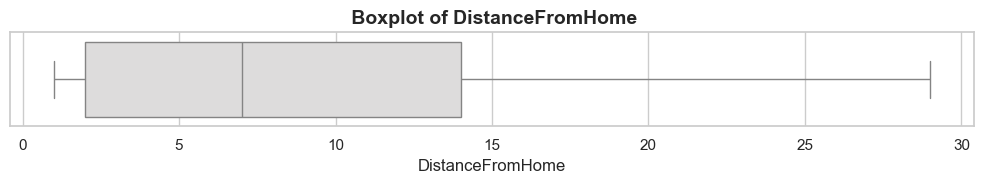

üîç Outlier Detection for 'DistanceFromHome':
IQR = 12.0
Lower Bound = -16.0
Upper Bound = 32.0
Total Outliers Detected: 0



Empty DataFrame
Columns: [Age, Gender, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating, EducationBackground_Life Sciences, EducationBackground_Marketing, EducationBackground_Medical, EducationBackground_Other, EducationBackground_Technical Degree, MaritalStatus_Married, MaritalStatus_Single, EmpDepartment_Development, EmpDepartment_Finance, EmpDepartment_Human Resources, EmpDepartment_Research & Development, EmpDepartment_Sales, EmpJobRole_Data Scientist, EmpJobRole_Delivery Manager, EmpJobRole_Developer, EmpJobRole_Finance Manager, EmpJobRole_Healthcare Representative, EmpJobRole_Human Resources, EmpJobRole_Laboratory Technician, EmpJobRole_Manager, EmpJobRole_Manager R&D, EmpJobRole_Manufacturing Director, EmpJobRole_Research Director, EmpJobRole_Research Scientist, EmpJobRole_Sales Executive, EmpJobRole_Sales Representative, EmpJobRole_Senior Developer, EmpJobRole_Senior Manager R&D, EmpJobRole_Technical Architect, EmpJobRole_Technical Lead, BusinessTravelFrequency_Travel_Frequently, BusinessTravelFrequency_Travel_Rarely]
Index: []

In [106]:
box('DistanceFromHome')

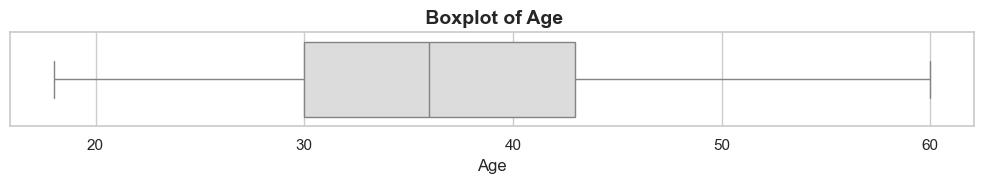

üîç Outlier Detection for 'Age':
IQR = 13.0
Lower Bound = 10.5
Upper Bound = 62.5
Total Outliers Detected: 0



Empty DataFrame
Columns: [Age, Gender, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating, EducationBackground_Life Sciences, EducationBackground_Marketing, EducationBackground_Medical, EducationBackground_Other, EducationBackground_Technical Degree, MaritalStatus_Married, MaritalStatus_Single, EmpDepartment_Development, EmpDepartment_Finance, EmpDepartment_Human Resources, EmpDepartment_Research & Development, EmpDepartment_Sales, EmpJobRole_Data Scientist, EmpJobRole_Delivery Manager, EmpJobRole_Developer, EmpJobRole_Finance Manager, EmpJobRole_Healthcare Representative, EmpJobRole_Human Resources, EmpJobRole_Laboratory Technician, EmpJobRole_Manager, EmpJobRole_Manager R&D, EmpJobRole_Manufacturing Director, EmpJobRole_Research Director, EmpJobRole_Research Scientist, EmpJobRole_Sales Executive, EmpJobRole_Sales Representative, EmpJobRole_Senior Developer, EmpJobRole_Senior Manager R&D, EmpJobRole_Technical Architect, EmpJobRole_Technical Lead, BusinessTravelFrequency_Travel_Frequently, BusinessTravelFrequency_Travel_Rarely]
Index: []

In [107]:
box('Age')

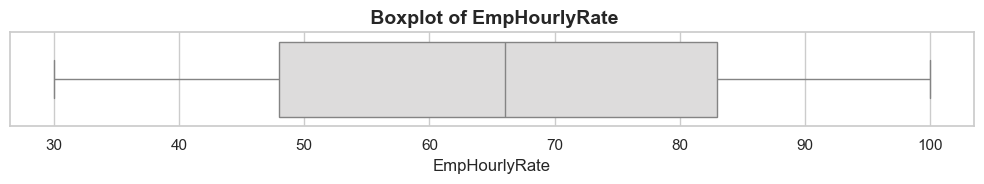

üîç Outlier Detection for 'EmpHourlyRate':
IQR = 35.0
Lower Bound = -4.5
Upper Bound = 135.5
Total Outliers Detected: 0



Empty DataFrame
Columns: [Age, Gender, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating, EducationBackground_Life Sciences, EducationBackground_Marketing, EducationBackground_Medical, EducationBackground_Other, EducationBackground_Technical Degree, MaritalStatus_Married, MaritalStatus_Single, EmpDepartment_Development, EmpDepartment_Finance, EmpDepartment_Human Resources, EmpDepartment_Research & Development, EmpDepartment_Sales, EmpJobRole_Data Scientist, EmpJobRole_Delivery Manager, EmpJobRole_Developer, EmpJobRole_Finance Manager, EmpJobRole_Healthcare Representative, EmpJobRole_Human Resources, EmpJobRole_Laboratory Technician, EmpJobRole_Manager, EmpJobRole_Manager R&D, EmpJobRole_Manufacturing Director, EmpJobRole_Research Director, EmpJobRole_Research Scientist, EmpJobRole_Sales Executive, EmpJobRole_Sales Representative, EmpJobRole_Senior Developer, EmpJobRole_Senior Manager R&D, EmpJobRole_Technical Architect, EmpJobRole_Technical Lead, BusinessTravelFrequency_Travel_Frequently, BusinessTravelFrequency_Travel_Rarely]
Index: []

In [108]:
box('EmpHourlyRate')

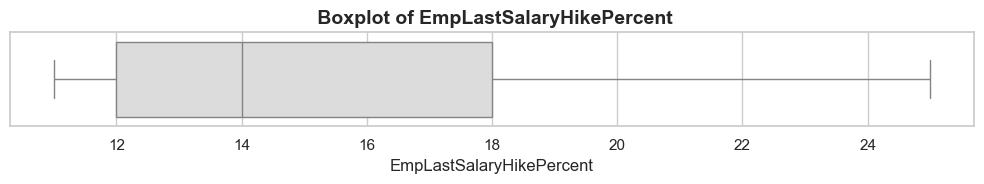

üîç Outlier Detection for 'EmpLastSalaryHikePercent':
IQR = 6.0
Lower Bound = 3.0
Upper Bound = 27.0
Total Outliers Detected: 0



Empty DataFrame
Columns: [Age, Gender, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating, EducationBackground_Life Sciences, EducationBackground_Marketing, EducationBackground_Medical, EducationBackground_Other, EducationBackground_Technical Degree, MaritalStatus_Married, MaritalStatus_Single, EmpDepartment_Development, EmpDepartment_Finance, EmpDepartment_Human Resources, EmpDepartment_Research & Development, EmpDepartment_Sales, EmpJobRole_Data Scientist, EmpJobRole_Delivery Manager, EmpJobRole_Developer, EmpJobRole_Finance Manager, EmpJobRole_Healthcare Representative, EmpJobRole_Human Resources, EmpJobRole_Laboratory Technician, EmpJobRole_Manager, EmpJobRole_Manager R&D, EmpJobRole_Manufacturing Director, EmpJobRole_Research Director, EmpJobRole_Research Scientist, EmpJobRole_Sales Executive, EmpJobRole_Sales Representative, EmpJobRole_Senior Developer, EmpJobRole_Senior Manager R&D, EmpJobRole_Technical Architect, EmpJobRole_Technical Lead, BusinessTravelFrequency_Travel_Frequently, BusinessTravelFrequency_Travel_Rarely]
Index: []

In [109]:
box('EmpLastSalaryHikePercent')

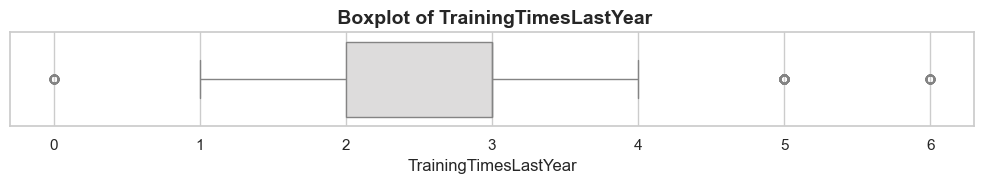

üîç Outlier Detection for 'TrainingTimesLastYear':
IQR = 1.0
Lower Bound = 0.5
Upper Bound = 4.5
Total Outliers Detected: 188



Age  Gender  DistanceFromHome  EmpEducationLevel  \
10   44       1                24                  3   
13   29       1                10                  3   
27   25       0                26                  1   
31   34       1                 2                  3   
55   35       0                 1                  4   

    EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
10                           1             49                  1            1   
13                           3             99                  3            1   
27                           3             32                  3            2   
31                           4             60                  3            2   
55                           4             40                  4            1   

    EmpJobSatisfaction  NumCompaniesWorked  OverTime  \
10                   3                   2         0   
13                   3                   1         0   
27                   4                   1         0   
31                   4                   1         0   
55                   3                   3         0   

    EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
10                        14                            3   
13                        11                            3   
27                        23                            2   
31                        22                            3   
55                        13                            3   

    TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
10                           9                      5                   3   
13                           1                      6                   3   
27                           6                      5                   2   
31                           6                      5                   3   
55                           7                      0                   3   

    ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
10                             5                             2   
13                             1                             0   
27                             6                             5   
31                             6                             5   
55                             2                             2   

    YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
10                        1                     4          0   
13                        0                     0          0   
27                        1                     4          0   
31                        1                     4          0   
55                        2                     2          0   

    PerformanceRating  EducationBackground_Life Sciences  \
10                  3                                  0   
13                  3                                  1   
27                  4                                  0   
31                  4                                  0   
55                  3                                  1   

    EducationBackground_Marketing  EducationBackground_Medical  \
10                              0                            1   
13                              0                            0   
27                              0                            1   
31                              0                            0   
55                              0                            0   

    EducationBackground_Other  EducationBackground_Technical Degree  \
10                          0                                     0   
13                          0                                     0   
27                          0                                     0   
31                          1                                     0   
55                          0                                     0   

    MaritalStatus_Married  MaritalStatus_Singl

In [110]:
box('TrainingTimesLastYear')

In [111]:
emp['TrainingTimesLastYear'].value_counts() #We wont consider them as outliers

TrainingTimesLastYear
2    445
3    413
4     98
5     98
1     56
6     46
0     44
Name: count, dtype: int64

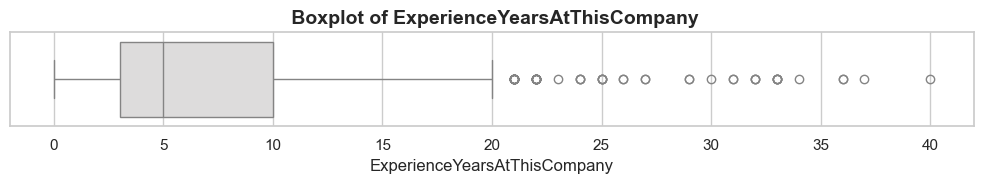

üîç Outlier Detection for 'ExperienceYearsAtThisCompany':
IQR = 7.0
Lower Bound = -7.5
Upper Bound = 20.5
Total Outliers Detected: 56



Age  Gender  DistanceFromHome  EmpEducationLevel  \
3     41       1                10                  4   
11    47       0                 3                  3   
25    52       1                 3                  4   
52    47       0                 2                  2   
100   50       1                 2                  4   

     EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
3                             2             73                  2   
11                            4             49                  3   
25                            3             31                  2   
52                            3             33                  3   
100                           1             98                  3   

     EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  OverTime  \
3              5                   4                   3         0   
11             4                   3                   9         1   
25             4                   1                   1         0   
52             4                   4                   1         1   
100            4                   1                   1         0   

     EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
3                          15                            2   
11                         12                            4   
25                         11                            1   
52                         11                            3   
100                        11                            4   

     TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
3                            23                      2                   2   
11                           28                      2                   2   
25                           34                      3                   4   
52                           26                      3                   2   
100                          31                      3                   3   

     ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
3                              21                             6   
11                             22                             2   
25                             34                             6   
52                             26                            14   
100                            31                             6   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
3                         12                     6          0   
11                        11                    13          0   
25                         1                    16          0   
52                         3                     0          0   
100                       14                     7          0   

     PerformanceRating  EducationBackground_Life Sciences  \
3                    3                                  0   
11                   3                                  0   
25                   4                                  0   
52                   3                                  0   
100                  3                                  1   

     EducationBackground_Marketing  EducationBackground_Medical  \
3                                0                            0   
11                               0                            1   
25                               1                            0   
52                               0                            0   
100                              0                            0   

     EducationBackground_Other  EducationBackground_Technical Degree  \
3                            0                                     0   
11                           0                                     0   
25                           0                                     0   
52                           1                                     0   
100                          0                              

In [112]:
box('ExperienceYearsAtThisCompany')

In [113]:
emp[(emp['Age'] < 41) & (emp['ExperienceYearsAtThisCompany'] > 21)  ] #Cant consider them as outliers

Age  Gender  DistanceFromHome  EmpEducationLevel  \
838   40       1                 1                  4   

     EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
838                           3             78                  2   

     EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  OverTime  \
838            4                   2                   1         0   

     EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
838                        22                            4   

     TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
838                          22                      3                   2   

     ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
838                            22                             3   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
838                       11                    11          0   

     PerformanceRating  EducationBackground_Life Sciences  \
838                  4                                  1   

     EducationBackground_Marketing  EducationBackground_Medical  \
838                              0                            0   

     EducationBackground_Other  EducationBackground_Technical Degree  \
838                          0                                     0   

     MaritalStatus_Married  MaritalStatus_Single  EmpDepartment_Development  \
838                      1                     0                          1   

     EmpDepartment_Finance  EmpDepartment_Human Resources  \
838                      0                              0   

     EmpDepartment_Research & Development  EmpDepartment_Sales  \
838                                     0                    0   

     EmpJobRole_Data Scientist  EmpJobRole_Delivery Manager  \
838                          0                            0   

     EmpJobRole_Developer  EmpJobRole_Finance Manager  \
838                     1                           0   

     EmpJobRole_Healthcare Representative  EmpJobRole_Human Resources  \
838                                     0                           0   

     EmpJobRole_Laboratory Technician  EmpJobRole_Manager  \
838                                 0                   0   

     EmpJobRole_Manager R&D  EmpJobRole_Manufacturing Director  \
838                       0                                  0   

     EmpJobRole_Research Director  EmpJobRole_Research Scientist  \
838                             0                              0   

     EmpJobRole_Sales Executive  EmpJobRole_Sales Representative  \
838                           0                                0   

     EmpJobRole_Senior Developer  EmpJobRole_Senior Manager R&D  \
838                            0                              0   

     EmpJobRole_Technical Architect  EmpJobRole_Technical Lead  \
838                               0                          0   

     BusinessTravelFrequency_Travel_Frequently  \
838                                          1   

     BusinessTravelFrequency_Travel_Rarely  
838                                      0

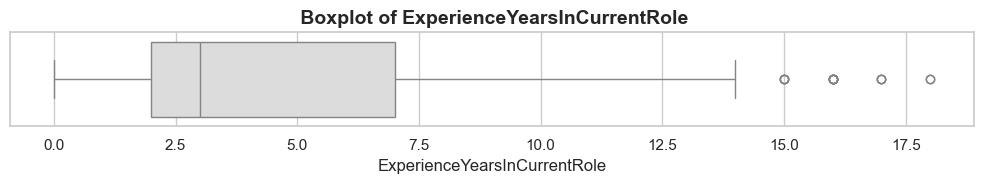

üîç Outlier Detection for 'ExperienceYearsInCurrentRole':
IQR = 5.0
Lower Bound = -5.5
Upper Bound = 14.5
Total Outliers Detected: 16



Age  Gender  DistanceFromHome  EmpEducationLevel  \
151   41       1                 9                  3   
175   41       0                 7                  1   
272   46       0                 2                  3   
361   56       1                23                  3   
501   35       1                18                  5   

     EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
151                           1             64                  3   
175                           2             55                  1   
272                           3             69                  3   
361                           4             68                  3   
501                           2             48                  4   

     EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  OverTime  \
151            5                   3                   2         0   
175            5                   3                   1         0   
272            4                   1                   8         0   
361            4                   2                   4         1   
501            2                   1                   1         0   

     EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
151                        17                            2   
175                        22                            2   
272                        23                            1   
361                        12                            1   
501                        11                            4   

     TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
151                          21                      2                   4   
175                          21                      3                   3   
272                          28                      2                   3   
361                          33                      0                   3   
501                          16                      2                   3   

     ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
151                            18                            16   
175                            21                            16   
272                            26                            15   
361                            19                            16   
501                            16                            15   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
151                        0                    11          0   
175                        5                    10          0   
272                       15                     9          0   
361                       15                     9          0   
501                        1                    10          0   

     PerformanceRating  EducationBackground_Life Sciences  \
151                  3                                  0   
175                  2                                  1   
272                  4                                  0   
361                  3                                  1   
501                  2                                  1   

     EducationBackground_Marketing  EducationBackground_Medical  \
151                              0                            1   
175                              0                            0   
272                              1                            0   
361                              0                            0   
501                              0                            0   

     EducationBackground_Other  EducationBackground_Technical Degree  \
151                          0                                     0   
175                          0                                     0   
272                          0                                     0   
361                          0                                     0   
501                          0                              

In [114]:
box('ExperienceYearsInCurrentRole')

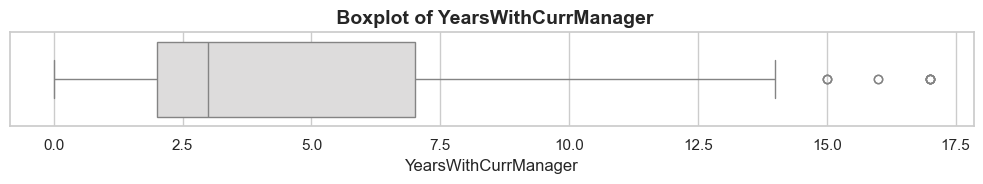

üîç Outlier Detection for 'YearsWithCurrManager':
IQR = 5.0
Lower Bound = -5.5
Upper Bound = 14.5
Total Outliers Detected: 11



Age  Gender  DistanceFromHome  EmpEducationLevel  \
25    52       1                 3                  4   
72    51       0                26                  4   
126   41       1                 6                  3   
283   44       1                29                  4   
320   43       0                 4                  4   

     EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
25                            3             31                  2   
72                            1             66                  3   
126                           4             59                  3   
283                           4             32                  3   
320                           4             56                  2   

     EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  OverTime  \
25             4                   1                   1         0   
72             4                   3                   2         0   
126            1                   1                   2         1   
283            2                   4                   1         0   
320            3                   4                   3         0   

     EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
25                         11                            1   
72                         14                            3   
126                        13                            3   
283                        25                            2   
320                        14                            4   

     TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
25                           34                      3                   4   
72                           29                      2                   2   
126                          20                      3                   3   
283                          20                      3                   3   
320                          23                      3                   4   

     ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
25                             34                             6   
72                             20                             6   
126                            18                            13   
283                            20                            11   
320                            21                             7   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
25                         1                    16          0   
72                         4                    17          0   
126                        2                    17          0   
283                       13                    17          0   
320                       15                    17          0   

     PerformanceRating  EducationBackground_Life Sciences  \
25                   4                                  0   
72                   3                                  0   
126                  3                                  0   
283                  4                                  0   
320                  3                                  0   

     EducationBackground_Marketing  EducationBackground_Medical  \
25                               1                            0   
72                               1                            0   
126                              0                            1   
283                              0                            0   
320                              1                            0   

     EducationBackground_Other  EducationBackground_Technical Degree  \
25                           0                                     0   
72                           0                                     0   
126                          0                                     0   
283                          1                                     0   
320                          0                              

In [115]:
box('YearsWithCurrManager')

**According to our Domain Knowledge ,we cant really consider them outliers**

#### Selecting the Columns for Training the Model by separating the Training and the Target Features

In [118]:
x = emp.drop('PerformanceRating',axis =1)
y = emp['PerformanceRating']

In [119]:
'PerformanceRating' in x.columns #As we see that the target has been successfully separated 

False

**Checking For Duplicates**

In [121]:
emp.duplicated().sum()  

0

### Scaling The Data

**Standard Scaling:** Standardization is the process of scaling the feature, it assumes the feature follow normal distribution and scale the feature between mean and standard deviation, here mean is 0 and standard deviation is always 1.

In [124]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [125]:
x[['Age',
 'Gender',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'OverTime',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition',
 'EducationBackground_Life Sciences',
 'EducationBackground_Marketing',
 'EducationBackground_Medical',
 'EducationBackground_Other',
 'EducationBackground_Technical Degree',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'EmpDepartment_Development',
 'EmpDepartment_Finance',
 'EmpDepartment_Human Resources',
 'EmpDepartment_Research & Development',
 'EmpDepartment_Sales',
 'EmpJobRole_Data Scientist',
 'EmpJobRole_Delivery Manager',
 'EmpJobRole_Developer',
 'EmpJobRole_Finance Manager',
 'EmpJobRole_Healthcare Representative',
 'EmpJobRole_Human Resources',
 'EmpJobRole_Laboratory Technician',
 'EmpJobRole_Manager',
 'EmpJobRole_Manager R&D',
 'EmpJobRole_Manufacturing Director',
 'EmpJobRole_Research Director',
 'EmpJobRole_Research Scientist',
 'EmpJobRole_Sales Executive',
 'EmpJobRole_Sales Representative',
 'EmpJobRole_Senior Developer',
 'EmpJobRole_Senior Manager R&D',
 'EmpJobRole_Technical Architect',
 'EmpJobRole_Technical Lead',
 'BusinessTravelFrequency_Travel_Frequently',
 'BusinessTravelFrequency_Travel_Rarely']] = sc.fit_transform(x[['Age',
 'Gender',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'OverTime',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition',
 'EducationBackground_Life Sciences',
 'EducationBackground_Marketing',
 'EducationBackground_Medical',
 'EducationBackground_Other',
 'EducationBackground_Technical Degree',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'EmpDepartment_Development',
 'EmpDepartment_Finance',
 'EmpDepartment_Human Resources',
 'EmpDepartment_Research & Development',
 'EmpDepartment_Sales',
 'EmpJobRole_Data Scientist',
 'EmpJobRole_Delivery Manager',
 'EmpJobRole_Developer',
 'EmpJobRole_Finance Manager',
 'EmpJobRole_Healthcare Representative',
 'EmpJobRole_Human Resources',
 'EmpJobRole_Laboratory Technician',
 'EmpJobRole_Manager',
 'EmpJobRole_Manager R&D',
 'EmpJobRole_Manufacturing Director',
 'EmpJobRole_Research Director',
 'EmpJobRole_Research Scientist',
 'EmpJobRole_Sales Executive',
 'EmpJobRole_Sales Representative',
 'EmpJobRole_Senior Developer',
 'EmpJobRole_Senior Manager R&D',
 'EmpJobRole_Technical Architect',
 'EmpJobRole_Technical Lead',
 'BusinessTravelFrequency_Travel_Frequently',
 'BusinessTravelFrequency_Travel_Rarely']])

In [126]:
x.head(3)

Age    Gender  DistanceFromHome  EmpEducationLevel  \
0 -0.541458  0.809427          0.102061           0.103000   
1  1.109888  0.809427          0.591464           1.061145   
2  0.339260  0.809427         -0.509693           1.061145   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                    1.177978      -0.543569           0.379608    -0.060955   
1                    1.177978      -1.187042           0.379608    -0.060955   
2                    1.177978      -0.890055          -1.035081     0.842082   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0            1.151824           -0.674538 -0.645573                 -0.889111   
1           -1.574386           -0.269410 -0.645573                 -0.889111   
2           -1.574386            0.945974  1.549010                  1.594054   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                     1.185833                   -0.170645   
1                     1.185833                    1.112397   
2                     0.255768                    1.112397   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0              -0.622235           -1.064491                      0.468778   
1              -0.622235            0.365956                     -0.012431   
2              -0.622235            0.365956                      1.752001   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                      0.749766                -0.681372   
1                      0.749766                -0.370834   
2                      2.410786                -0.370834   

   YearsWithCurrManager  Attrition  EducationBackground_Life Sciences  \
0              1.100251  -0.417335                          -0.833616   
1              0.817773  -0.417335                          -0.833616   
2              2.230163  -0.417335                           1.199593   

   EducationBackground_Marketing  EducationBackground_Medical  \
0                       2.785520                    -0.685994   
1                       2.785520                    -0.685994   
2                      -0.358999                    -0.685994   

   EducationBackground_Other  EducationBackground_Technical Degree  \
0                  -0.241249                             -0.301511   
1                  -0.241249                             -0.301511   
2                  -0.241249                             -0.301511   

   MaritalStatus_Married  MaritalStatus_Single  EmpDepartment_Development  \
0              -0.916783              1.457738                  -0.655953   
1              -0.916783              1.457738                  -0.655953   
2               1.090771             -0.685994                  -0.655953   

   EmpDepartment_Finance  EmpDepartment_Human Resources  \
0              -0.206329                      -0.217072   
1              -0.206329                      -0.217072   
2              -0.206329                      -0.217072   

   EmpDepartment_Research & Development  EmpDepartment_Sales  \
0                              -0.63264             1.489012   
1                              -0.63264             1.489012   
2                              -0.63264             1.489012   

   EmpJobRole_Data Scientist  EmpJobRole_Delivery Manager  \
0                  -0.130189                    -0.100504   
1                  -0.130189                    -0.100504   
2                  -0.130189                    -0.100504   

   EmpJobRole_Developer  EmpJobRole_Finance Manager  \
0             -0.494786                   -0.206329   
1             -0.494786                   -0.206329   
2             -0.494786                   -0.206329   

   EmpJobRole_Healthcare Representative  EmpJobRole_Human Resources  \
0                              -0.16816                   -0.197386   
1                              -0.16816                   -0.197

In [127]:
x.shape

(1200, 53)

# PRINCIPLE COMPONENT ANALYSIS

- Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. Formally, PCA is a statistical technique for reducing the dimensionality of a dataset.

**Used For:** The dataset contain more than 50 feature, removes the noise in the data and keeps only the most important features in the dataset. That will mitigate the overfitting of the data and increase the model's performance.

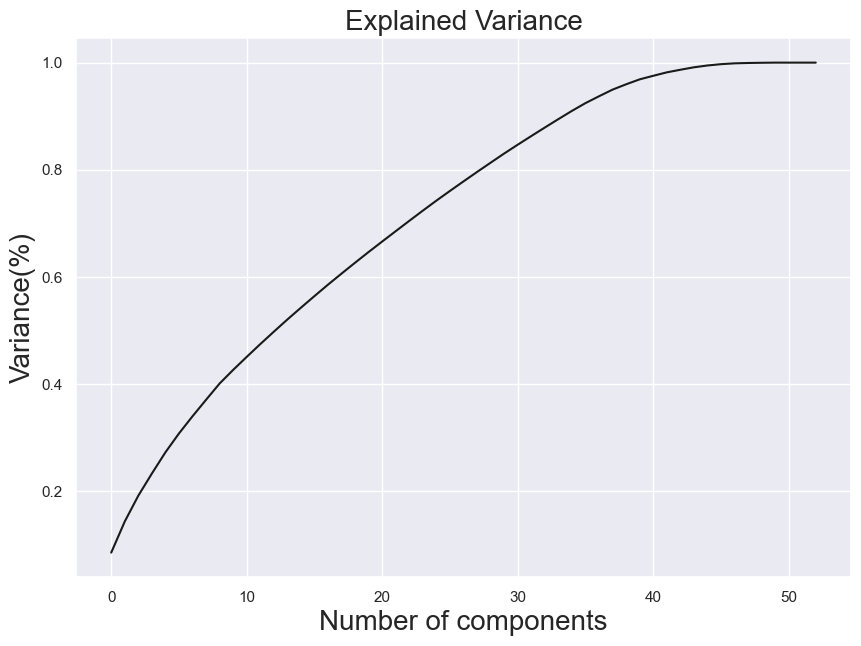

In [131]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

# Object creation
pca = PCA()

principlecomponent = pca.fit_transform(x)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

**From the Above graph we derive**

##### Interpretation:
**Steep initial growth:**

The first 10‚Äì15 components capture a significant portion of the variance.

This implies that a large amount of information is concentrated in the first few features.

**Elbow point around 25‚Äì30 components:**

After ~30 components, the curve starts to flatten, meaning additional components contribute marginally to the total variance.

This is the classic elbow rule in PCA: choose the number of components before the curve flattens.

>95% variance captured by ~40 components:

The curve approaches saturation (~1.0) around 40‚Äì46 components.

So, retaining these components will preserve almost all the data variance, while reducing dimensionality significantly.

In [133]:
pca = PCA(n_components=46)
new_data = pca.fit_transform(x)
new_data.shape


(1200, 46)

In [134]:
pca_df = pd.DataFrame(data = new_data,columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10',
 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20',
 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30',
 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40',
 'pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46']
)

pca_df['PerformanceRating'] = emp.PerformanceRating
pca_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  0.777437  3.438805 -0.500606 -0.317876 -0.597884  0.081731 -0.019466   
1  1.685746  3.279505 -0.459331 -0.209121  0.053200 -0.493439 -1.133141   
2  3.547964  1.542528  0.032680 -0.653110 -0.373439  1.720657  0.328316   
3  4.958769 -0.273500  0.029516  0.896307  3.621045  0.590578 -0.493869   
4  0.448619  3.278486 -0.516815 -0.224866  1.019549 -1.847371 -2.893207   

       pca8      pca9     pca10     pca11     pca12     pca13     pca14  \
0  0.116772  1.452364 -0.960114  1.891136  0.487388  0.531450 -1.059908   
1 -0.110635  1.092775 -0.435285  2.134062 -0.333705  0.797323 -0.188451   
2  1.805604 -1.824697  0.783074  1.129610  0.363940 -0.380987  0.209130   
3  0.120523  1.321479  0.688242 -1.019371  0.130938  0.041944  0.146988   
4 -0.039654 -0.289869  0.036455  1.286489 -2.242746  1.080717 -1.249848   

      pca15     pca16     pca17     pca18     pca19     pca20     pca21  \
0 -0.576313  0.164705  0.180014 -0.175816 -0.315744 -0.277492  0.117113   
1 -0.705788  0.686484 -0.274544  0.538132 -0.276845 -0.161125 -0.140135   
2 -0.303373  0.301647  0.339689  0.000967  0.297337  0.122671  0.623747   
3  1.304490 -1.760473 -1.478523 -0.977766 -1.275876 -0.267468 -0.460967   
4 -0.387034  0.683999 -0.390034  0.433908 -0.556583 -0.016924 -0.023176   

      pca22     pca23     pca24     pca25     pca26     pca27     pca28  \
0 -0.166088 -0.459895  0.170396 -1.176280 -0.604390 -0.004601  0.699485   
1 -0.094147  0.417183 -0.438966 -0.467434 -0.282091  0.556172 -0.405304   
2 -0.854463  0.992397  0.454660  0.681138  0.713894  1.354769 -1.410265   
3 -0.170096 -1.850377  0.628985 -0.655866 -0.192880 -1.107398  0.418891   
4  0.363061  0.517252 -0.836581 -0.357959 -0.709364  1.054053 -0.057460   

      pca29     pca30     pca31     pca32     pca33     pca34     pca35  \
0 -1.110765  0.988045 -0.830466  0.608071  0.274131  0.065465  0.034441   
1  0.271389  0.597826 -1.620368  0.614258  1.079571 -0.506068  0.335783   
2  0.491382 -0.441031  0.145051 -0.005786  1.589493  1.134953 -0.138806   
3 -0.527172  0.271289 -0.812337  0.046429 -0.918337  0.732364 -0.156876   
4 -0.154290 -0.580108 -0.881772 -0.282308  0.291258 -0.855351 -0.474075   

      pca36     pca37     pca38     pca39     pca40     pca41     pca42  \
0 -0.743252  1.402541 -0.353696 -0.458180 -0.736332  0.297960  0.277553   
1 -1.154537  1.175381  0.756934  0.230762 -0.725435  0.664955 -0.338352   
2 -0.449203 -1.291248  0.971545 -2.086581 -1.107539  0.589132  0.465041   
3 -0.359505 -1.287810 -1.717681  0.229371  2.194187 -1.081720  0.033914   
4  0.002870  1.117117  0.843561  0.255693  0.814755  1.081423 -0.962560   

      pca43     pca44     pca45     pca46  PerformanceRating  
0 -0.078323  0.055722 -0.010620  0.139735                  3  
1  0.065733  0.154483  0.013355  0.855182                  3  
2  0.233740  0.487122  0.150819 -0.005295                  4  
3 -0.276574  0.382096  0.123656 -0.634970                  3  
4  0.115137  0.294452 -0.279963 -0.606762                  3

# ModelCreation and Evaluation Summary

- Balancing the Target Features
- Split Training and testing data
- Model Creation,Prediction and Evaluation
- Model Saving

In [137]:
X = pca_df.drop('PerformanceRating',axis = 1)
Y = pca_df['PerformanceRating']

### Balancing the Features

**SMOTE:** 
SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [140]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(Y))
X_sm,Y_sm = sm.fit_resample(X,Y)
print("balanced data:    :",Counter(Y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


- AS we can see that the Target feature has been Balanced

## Testing Different Classification Models

In [143]:
# Let's start by making a function for all the models we know work for Classification

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Instantiate models
svc = SVC()
logr = LogisticRegression()
sgdc = SGDClassifier()
knc = KNeighborsClassifier()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
mlpc = MLPClassifier()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
lgbmc = LGBMClassifier()

# Dictionary of Models
models = {
    "a": ["LogisticRegression", logr],
    "b": ["SVC", svc],
    "c": ["SGDClassifier", sgdc],
    "d": ["KNeighborsClassifier", knc],
    "e": ["GaussianNB", gnb],
    "f": ["DecisionTreeClassifier", dtc],
    "g": ["GradientBoostingClassifier", gbc],
    "h": ["RandomForestClassifier", rfc],
    "i": ["AdaBoostClassifier", abc],
    "j": ["MLPClassifier", mlpc],
    "k": ["LinearDiscriminantAnalysis", lda],
    "l": ["QuadraticDiscriminantAnalysis", qda],
    "n": ["LGBMClassifier", lgbmc]  
}


In [144]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

def test_model_classification(model, X, Y):
    '''X = All features (inputs) for training the model
       Y = Target labels (classification)'''
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    accuracy = make_scorer(accuracy_score)
    acc_val = cross_val_score(model, X, Y, cv=cv, scoring=accuracy)
    score = [acc_val.mean()]
    return score


In [145]:
models_score = []
for model in models:
        print("Training Model : ",models[model][0])
        score = test_model_classification(models[model][1],X_sm,Y_sm)
        print('Score of the Model : ',score[0])

Training Model :  LogisticRegression
Score of the Model :  0.8512574484339189
Training Model :  SVC
Score of the Model :  0.9336399286987521
Training Model :  SGDClassifier
Score of the Model :  0.826078940667176
Training Model :  KNeighborsClassifier
Score of the Model :  0.8028041762159408
Training Model :  GaussianNB
Score of the Model :  0.7280580595874714
Training Model :  DecisionTreeClassifier
Score of the Model :  0.805475935828877
Training Model :  GradientBoostingClassifier
Score of the Model :  0.9134300993124523
Training Model :  RandomForestClassifier
Score of the Model :  0.9511851285968932
Training Model :  AdaBoostClassifier
Score of the Model :  0.7864211866564806
Training Model :  MLPClassifier
Score of the Model :  0.9492711993888464
Training Model :  LinearDiscriminantAnalysis
Score of the Model :  0.8405805958747136
Training Model :  QuadraticDiscriminantAnalysis
Score of the Model :  0.7456124267888974
Training Model :  LGBMClassifier
[LightGBM] [Info] Auto-choosi

## From the Above Datas,the Best Scoring Models we conclude to be
- **SVC :** 0.9336399286987521
- **RandomForestClassifier :** 0.9511851285968932
- **LGBMClassifier :** 0.9427960275019098

Lets try with the Hyper Parameter Tuning with each of these to bring out the best accurracy for our Model

### HyperParameter Tuning for the SVC

In [148]:
from skopt.space import Real, Categorical, Integer

param_space = {
    'C': Real(1e-3, 1e3, prior='log-uniform'),             # Regularization strength
    'kernel': Categorical(['linear', 'rbf', 'poly', 'sigmoid']),
    'gamma': Categorical(['scale', 'auto']),               # or use Real(1e-4, 1e-1, prior='log-uniform') for fine tuning
    'degree': Integer(2, 5),                               # Only used for 'poly' kernel
    'class_weight': Categorical([None, 'balanced'])
}


In [149]:
from skopt import BayesSearchCV
from sklearn.svm import SVC

svc = SVC()

search = BayesSearchCV(
    estimator=svc,
    search_spaces=param_space,
    n_iter=80,             # You can increase this for better tuning
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit on training data
search.fit(X_sm, Y_sm)

# Best results
print("Best Parameters:", search.best_params_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [150]:
svc_f = SVC(**search.best_params_)
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY = train_test_split(X_sm, Y_sm ,test_size = 0.2,random_state=42)
svc_f.fit(trainX,trainY)
Y_pred_svc = svc_f.predict(testX)

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report



acc1 = accuracy_score(testY,Y_pred_svc)
pr1 = precision_score(testY,Y_pred_svc,average='weighted')
re1 = recall_score(testY,Y_pred_svc,average='weighted')
f11 = f1_score(testY,Y_pred_svc,average='weighted')
cm1 = confusion_matrix(testY,Y_pred_svc)
print('Accuracy Score: ',acc1,'\nPrecision:', pr1,'\nRecall Score:', re1,'\nF1 Score', f11, '\nConfusion Matrix: \n', cm1)
print(classification_report(testY,Y_pred_svc))

Accuracy Score:  0.9523809523809523 
Precision: 0.9543544717816693 
Recall Score: 0.9523809523809523 
F1 Score 0.9515307187674885 
Confusion Matrix: 
 [[184   0   0]
 [ 13 150  10]
 [  0   2 166]]
              precision    recall  f1-score   support

           2       0.93      1.00      0.97       184
           3       0.99      0.87      0.92       173
           4       0.94      0.99      0.97       168

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.95      0.95       525



### HyperParameter Tuning for RandomForestClassifier

In [153]:
from skopt.space import Integer, Real, Categorical

param_space_rfc = {
    'n_estimators': Integer(100, 1000),                         # Number of trees
    'max_depth': Integer(5, 50),                                # Depth of tree
    'min_samples_split': Integer(2, 20),                        # Minimum samples to split a node
    'min_samples_leaf': Integer(1, 20),                         # Minimum samples at a leaf
    'max_features': Categorical([ 'sqrt', 'log2']),      # Features to consider at each split
    'bootstrap': Categorical([True, False]),                    # Use bootstrap samples?
    'class_weight': Categorical([None, 'balanced'])             # Handle class imbalance
}


In [154]:
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV

# Model
rfc = RandomForestClassifier(random_state=42)

# Bayesian Search CV
rfc_bayes = BayesSearchCV(
    estimator=rfc,
    search_spaces=param_space_rfc,
    n_iter=80,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit to training data
rfc_bayes.fit(X_sm,Y_sm)

# Best parameters
print("Best Parameters:", rfc_bayes.best_params_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [155]:
rfc_f = RandomForestClassifier(**rfc_bayes.best_params_)
rfc_f.fit(trainX,trainY)
Y_pred_rfc = rfc_f.predict(testX)

In [156]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report



acc = accuracy_score(testY,Y_pred_rfc)
pr = precision_score(testY,Y_pred_rfc,average='weighted')
re = recall_score(testY,Y_pred_rfc,average='weighted')
f1 = f1_score(testY,Y_pred_rfc,average='weighted')
cm = confusion_matrix(testY,Y_pred_rfc)
print('Accuracy Score: ',acc,'\nPrecision:', pr,'\nRecall Score:', re,'\nF1 Score', f1, '\nConfusion Matrix: \n', cm)
print(classification_report(testY,Y_pred_rfc))

Accuracy Score:  0.96 
Precision: 0.9605155574083093 
Recall Score: 0.96 
F1 Score 0.959672446287428 
Confusion Matrix: 
 [[181   2   1]
 [ 10 157   6]
 [  0   2 166]]
              precision    recall  f1-score   support

           2       0.95      0.98      0.97       184
           3       0.98      0.91      0.94       173
           4       0.96      0.99      0.97       168

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



### HyperParaMeter Tuning for LGBMClassifier

In [158]:
from skopt.space import Real, Integer, Categorical

param_space_lgbm = {
    'n_estimators': Integer(100, 1000),                      # Number of boosting rounds
    'learning_rate': Real(0.001, 0.3, prior='log-uniform'),  # Step size shrinkage
    'num_leaves': Integer(20, 150),                          # Leaf count in one tree
    'max_depth': Integer(3, 40),                             # Tree depth
    'min_child_samples': Integer(5, 100),                    # Minimum data in one leaf
    'subsample': Real(0.5, 1.0),                             # Row sampling
    'colsample_bytree': Real(0.5, 1.0),                      # Feature sampling
    'reg_alpha': Real(1e-8, 10.0, prior='log-uniform'),      # L1 regularization
    'reg_lambda': Real(1e-8, 10.0, prior='log-uniform'),     # L2 regularization
    'boosting_type': Categorical(['gbdt', 'dart']),          # Boosting algorithm
    'class_weight': Categorical([None, 'balanced'])          # Handle class imbalance
}


In [159]:
from lightgbm import LGBMClassifier
from skopt import BayesSearchCV

lgbm = LGBMClassifier(random_state=42)

lgbm_bayes = BayesSearchCV(
    estimator=lgbm,
    search_spaces=param_space_lgbm,
    n_iter=80,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

lgbm_bayes.fit(X_sm,Y_sm)

print("Best Parameters:", lgbm_bayes.best_params_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [160]:
lgbm_f = LGBMClassifier(**lgbm_bayes.best_params_)
lgbm_f.fit(trainX,trainY)
Y_pred_lgbm = lgbm_f.predict(testX)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11730
[LightGBM] [Info] Number of data points in the train set: 2097, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report



acc2 = accuracy_score(testY,Y_pred_lgbm)
pr2 = precision_score(testY,Y_pred_lgbm,average='weighted')
re2 = recall_score(testY,Y_pred_lgbm,average='weighted')
f12 = f1_score(testY,Y_pred_lgbm,average='weighted')
cm2 = confusion_matrix(testY,Y_pred_lgbm)
print('Accuracy Score: ',acc2,'\nPrecision:', pr2,'\nRecall Score:', re2,'\nF1 Score', f12, '\nConfusion Matrix: \n', cm2)
print(classification_report(testY,Y_pred_lgbm))

Accuracy Score:  0.9485714285714286 
Precision: 0.9494262460822971 
Recall Score: 0.9485714285714286 
F1 Score 0.9479646168334936 
Confusion Matrix: 
 [[181   2   1]
 [ 11 152  10]
 [  0   3 165]]
              precision    recall  f1-score   support

           2       0.94      0.98      0.96       184
           3       0.97      0.88      0.92       173
           4       0.94      0.98      0.96       168

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.95      0.95       525



#### Model

In the section below, we used algorithms like Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbor, XGBoost Classifier and Artificial Neural Network to calculate the accuracy and found out that Random Forest with GridSearchCV gives the maximum accuracy of 93%.


##### Clearly RandomForestClassifier is giving the Best Score with an accuraccy of 96%